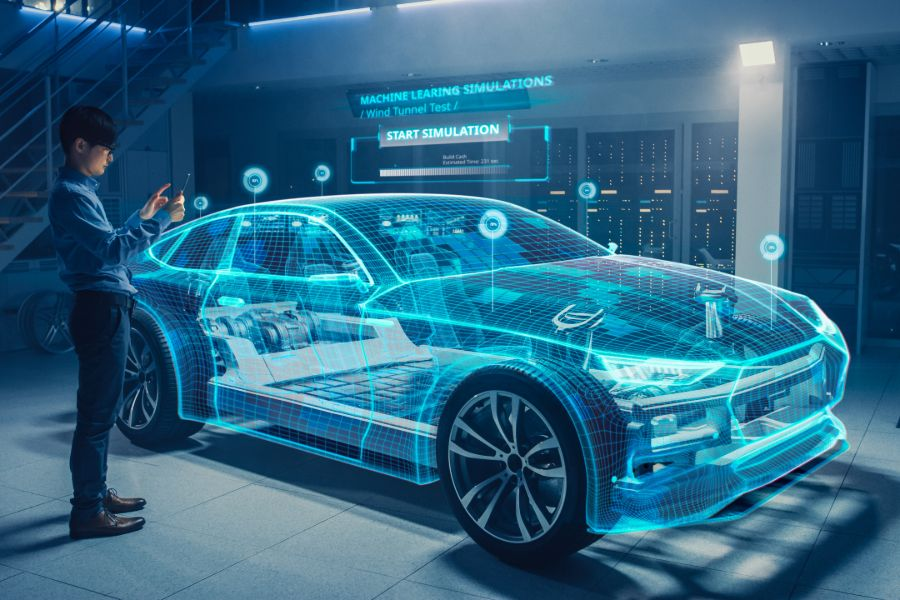

<div class="alert alert-block alert-info">

<h1>Car Price Prediction

</div>

<div class="alert alert-block alert-success">
    <h1>Introduction</h1>
<p>Predicting the price of a used cars has been studied extensively  in various researches.
<p>Car price prediction is a somehow an interesting and popular problem.
<p>Accurate car price prediction involves expert knowledge, because price usually
depends on many distinctive features and factors.
<p>Typically, the most signiﬁcant ones are brand and model, age, mileage etc. The fuel type
used in the car highly affect the price of a car due to a frequent changes in the price of
a fuel.
<p>Different features like color, type of transmission, safety, air condition, etc. will
also inﬂuence the car price.
</div>

<div class="alert alert-block alert-info">

## Import libraries
<p><b> Let's Load All Libraries that we need </b></p>

    
</div>

In [1]:
import os
import io
import pandas as pd # for data handling and analysis
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 200)
import numpy as np # for computation
import seaborn as sns
import matplotlib.pyplot as plt # for plotting
plt.rcParams["figure.figsize"] = (10, 8)
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# metrics to evaluate models
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
# from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

from sklearn import preprocessing

from sklearn.base import TransformerMixin

from sklearn.model_selection import GridSearchCV # to fine-tune hyperparameters
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

!pip install shap -q
import shap
!pip install lime -q
from lime import lime_tabular
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestClassifier # classifier
from sklearn.ensemble import RandomForestRegressor # classifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression # classifier
from sklearn.linear_model import LogisticRegression # classifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesRegressor
import pickle # for saving and loading trained models
from sklearn.tree import plot_tree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


<div class="alert alert-block alert-info">

## Read data into dataframes
    
</div>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/MachineLearningProjects/CarPricePrediction/

/content/drive/MyDrive/MachineLearningProjects/CarPricePrediction


In [4]:
CarData = pd.read_csv("data/CarPriceData.csv") # read data into dataframe

<div class="alert alert-block alert-success">

<p><b> Dataset info </b>
<p> Brand   = Car brand.
<p> Price   = price of the car, and our target coumn.
<p> Body    = car type
<p> Mileage = How many mileage the car has driven.
<p> EngineV = volume of the car engine. the sports car have larger engine and have higher price and economy car have smaler engine and lesser price
<p> Registration = The car have registralion paper ar not
<p> Year = The year when the car is first bought by The firsi owner.
<p> Model = The model of the car.

<div class="alert alert-block alert-info">

### Exploratory Data Analysis (EDA)
#### Data Exploration



</div>

In [5]:
CarData.head()

Brand     Price       Body  Mileage  EngineV Engine Type  \
0            BMW  4,200.00      sedan      277     2.00      Petrol   
1  Mercedes-Benz  7,900.00        van      427     2.90      Diesel   
2  Mercedes-Benz 13,300.00      sedan      358     5.00         Gas   
3           Audi 23,000.00  crossover      240     4.20      Petrol   
4         Toyota 18,300.00  crossover      120     2.00      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

In [6]:
CarData.tail()

Brand      Price   Body  Mileage  EngineV Engine Type  \
4340  Mercedes-Benz 125,000.00  sedan        9     3.00      Diesel   
4341            BMW   6,500.00  sedan        1     3.50      Petrol   
4342            BMW   8,000.00  sedan      194     2.00      Petrol   
4343         Toyota  14,200.00  sedan       31      NaN      Petrol   
4344     Volkswagen  13,500.00    van      124     2.00      Diesel   

     Registration  Year              Model  
4340          yes  2014              S 350  
4341          yes  1999                535  
4342          yes  1985                520  
4343          yes  2014            Corolla  
4344          yes  2013  T5 (Transporter)

In [7]:
CarData.sample(5)

Brand     Price   Body  Mileage  EngineV Engine Type  \
4222        Renault 10,500.00  vagon      250     1.50      Diesel   
1219  Mercedes-Benz 12,800.00  other      360     2.20      Diesel   
3953  Mercedes-Benz  5,500.00  sedan      269     2.20      Petrol   
4315     Volkswagen 15,500.00  sedan       80     1.40      Petrol   
3615            BMW  6,699.00  sedan      299     2.20      Petrol   

     Registration  Year    Model  
4222          yes  2011   Megane  
1219          yes  2008     Vito  
3953          yes  1994  E-Class  
4315          yes  2013    Jetta  
3615          yes  2001      523

In [8]:
CarData.shape

(4345, 9)

In [9]:
CarData.describe(include='all')

Brand      Price   Body  Mileage  EngineV Engine Type  \
count         4345   4,173.00   4345 4,345.00 4,195.00        4345   
unique           7        NaN      6      NaN      NaN           4   
top     Volkswagen        NaN  sedan      NaN      NaN      Diesel   
freq           936        NaN   1649      NaN      NaN        2019   
mean           NaN  19,418.75    NaN   161.24     2.79         NaN   
std            NaN  25,584.24    NaN   105.71     5.07         NaN   
min            NaN     600.00    NaN     0.00     0.60         NaN   
25%            NaN   6,999.00    NaN    86.00     1.80         NaN   
50%            NaN  11,500.00    NaN   155.00     2.20         NaN   
75%            NaN  21,700.00    NaN   230.00     3.00         NaN   
max            NaN 300,000.00    NaN   980.00    99.99         NaN   

       Registration     Year    Model  
count          4345 4,345.00     4345  
unique            2      NaN      312  
top             yes      NaN  E-Class  
freq           3947      NaN      199  
mean            NaN 2,006.55      NaN  
std             NaN     6.72      NaN  
min             NaN 1,969.00      NaN  
25%             NaN 2,003.00      NaN  
50%             NaN 2,008.00      NaN  
75%             NaN 2,012.00      NaN  
max             NaN 2,016.00      NaN

In [10]:
CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


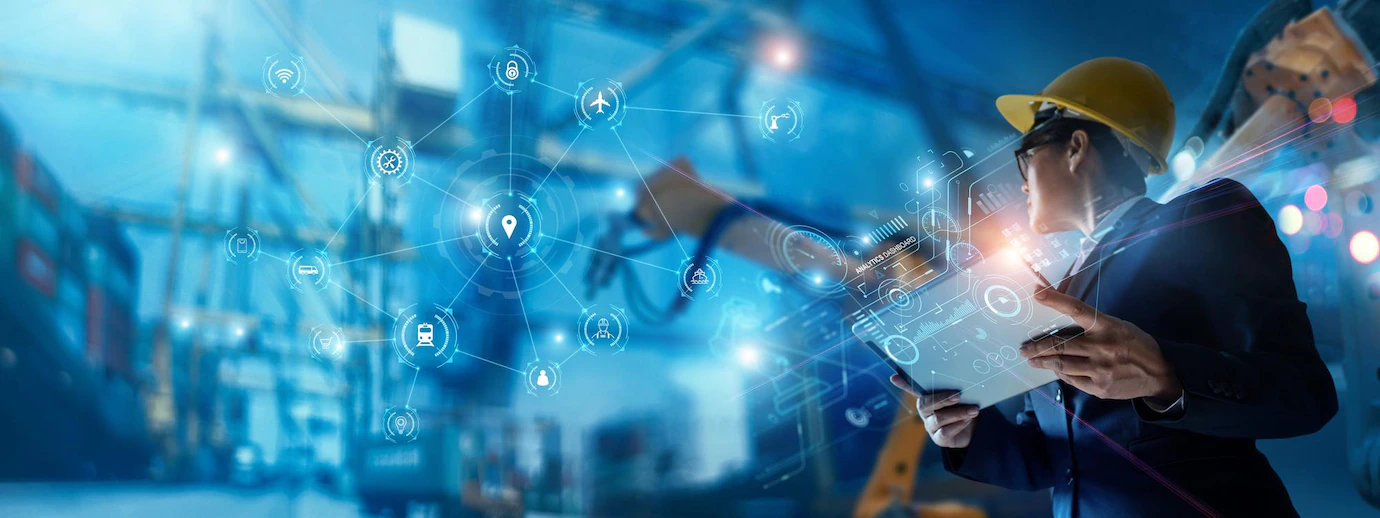

<div class="alert alert-block alert-info" text-align='justify'>

## Data Cleaning
<p>Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.
<p>When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct.
<p>There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset.
<p>But it is crucial to establish a template for your data cleaning process so you know you are doing it the right way every time.
<p></br></p>
<b>Feature Engineering
    
</div>

<div class="alert alert-block alert-info">

<p><b> Check And Remove Duplication

</div>

In [11]:
CarData.duplicated().any()

True

In [12]:
CarData.duplicated().sum()

73

In [13]:
CarData.drop_duplicates(inplace=True)

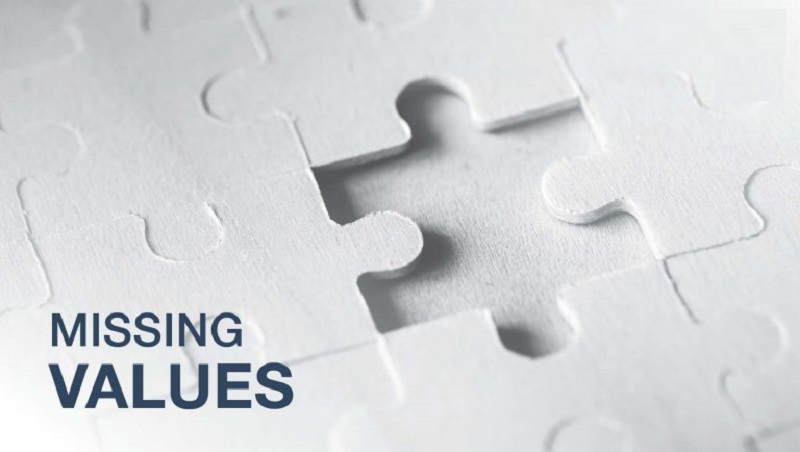

<div class="alert alert-block alert-info">

### Missing data
### Checking which columns have missing data


> The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.


    
</div>

<div class="alert alert-block alert-success">

<p><b> Check And Remove Missing Value

</div>

In [14]:
def FindMissingColsPercentage(df):

    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        # mean = sum / total
        pct = df[col].isnull().mean() * 100
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
        total += missing_vals

    if total == 0:
        print("no missing values")

In [15]:
FindMissingColsPercentage(CarData)

Price => 149 [3.49%]
EngineV => 150 [3.51%]


<div class="alert alert-block alert-success">

### How to deal with missing data?

Dealing with missing data is not simple task, you have need to consider why the data is missing in the first place, and domain knowledge to know what to impute.

There also isn't a specific threshold for what percentage of missing data is accepted, it depends on the data.

If you mess it up, you will introduce bias to your data.  


#### Techniques
1. Drop feature
1. Drop the rows
1. Impute missing values
    
</div>

In [16]:
CarData = CarData.dropna()

<div class="alert alert-block alert-info">

<p><b> replace whitespace with underscore '_'
<p><b> lower case column names
<p><b> change column name

</div>
    
    

In [17]:
CarData.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [18]:
CarData.columns = CarData.columns.str.replace(' ', "_")

In [19]:
CarData.columns.to_list()

['Brand',
 'Price',
 'Body',
 'Mileage',
 'EngineV',
 'Engine_Type',
 'Registration',
 'Year',
 'Model']

In [20]:
CarData.sample(5)

Brand     Price       Body  Mileage  EngineV Engine_Type  \
2487  Volkswagen  9,000.00        van      181     1.60      Diesel   
3946  Volkswagen  3,300.00      vagon      430     1.80      Petrol   
4105         BMW  5,400.00  crossover      250     3.00      Petrol   
1096  Volkswagen 11,200.00        van      200     2.50      Diesel   
3840  Volkswagen 30,900.00      sedan       30     2.00      Diesel   

     Registration  Year             Model  
2487          yes  2011             Caddy  
3946          yes  1991         Passat B3  
4105           no  2003                X5  
1096          yes  2003  T4 (Transporter)  
3840          yes  2014         Passat B7

In [21]:
new_columns_names =  {'Engine_Type':'Fuel_Type'}
CarData.rename(columns = new_columns_names, inplace = True)

In [22]:
CarData.sample(1)

Brand     Price   Body  Mileage  EngineV Fuel_Type Registration  Year  \
3662   BMW 13,700.00  sedan      122     2.00    Petrol          yes  2007   

     Model  
3662   318

In [23]:
CarData.nunique()

Brand             7
Price           892
Body              6
Mileage         407
EngineV          72
Fuel_Type         4
Registration      2
Year             39
Model           306
dtype: int64

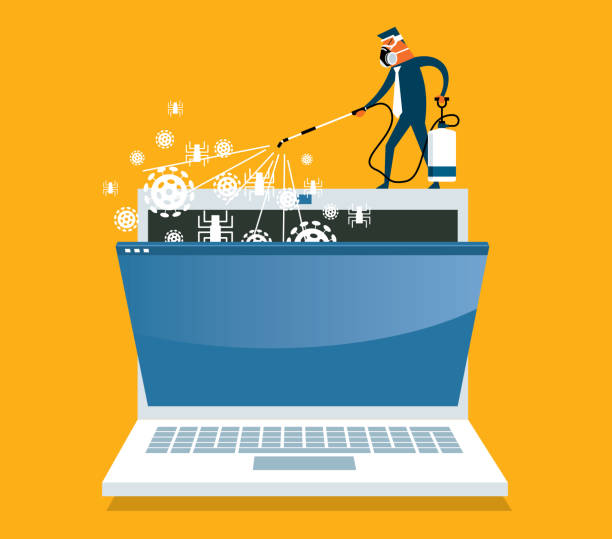


<div class="alert alert-block alert-info">

### Data Inconsistencies Check

* out of range data

* Is the year in the column year over 2022 ?



### Categorical data inconsistency

> caused by human error (wrong spelling, different case categories)
    
</div>

<div class="alert alert-block alert-success">

<p><b> Check For Misspell or Inconsistent data

</div>

In [24]:
CarData.Brand.unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [25]:
CarData['Brand'] = CarData['Brand'].astype('category')

In [26]:
CarData.Brand.unique()

['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'Mitsubishi']
Categories (7, object): ['Audi', 'BMW', 'Mercedes-Benz', 'Mitsubishi', 'Renault', 'Toyota',
                         'Volkswagen']

In [27]:
CarData.Body.unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [28]:
# replace the wrong spelling with right spelling

wrong_spelling = ['hatch', 'vagon']
right_spelling = ['hatchback', 'wagon']

CarData['Body'].replace(to_replace = wrong_spelling, value = right_spelling, inplace = True)

In [29]:
CarData['Body'] = CarData['Body'].str.capitalize()

In [30]:
CarData['Body'] = CarData['Body'].astype('category')

In [31]:
CarData.Body.unique()

['Sedan', 'Van', 'Crossover', 'Wagon', 'Other', 'Hatchback']
Categories (6, object): ['Crossover', 'Hatchback', 'Other', 'Sedan', 'Van', 'Wagon']

In [32]:
CarData['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [33]:
CarData['Fuel_Type'] = CarData['Fuel_Type'].astype('category')

In [34]:
CarData.Fuel_Type.unique()

['Petrol', 'Diesel', 'Gas', 'Other']
Categories (4, object): ['Diesel', 'Gas', 'Other', 'Petrol']

In [35]:
CarData['Registration'].unique()

array(['yes', 'no'], dtype=object)

In [36]:
CarData['Registration'] = CarData['Registration'].astype('category')

In [37]:
CarData.Registration.unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [38]:
CarData['Price'].head(5)

0    4,200.00
1    7,900.00
2   13,300.00
3   23,000.00
4   18,300.00
Name: Price, dtype: float64

In [39]:
CarData['Price'] = CarData['Price'].astype('int64')

In [40]:
CarData['Price'].head(5)

0     4200
1     7900
2    13300
3    23000
4    18300
Name: Price, dtype: int64

In [41]:
CarData.dtypes

Brand           category
Price              int64
Body            category
Mileage            int64
EngineV          float64
Fuel_Type       category
Registration    category
Year               int64
Model             object
dtype: object

In [42]:
CarData.loc[CarData.Year > 2022]

Empty DataFrame
Columns: [Brand, Price, Body, Mileage, EngineV, Fuel_Type, Registration, Year, Model]
Index: []


<div class="alert alert-block alert-info">

<p><b> Create New Feature
    
    

</div>

In [43]:
CarData.Year.describe()

count   3,975.00
mean    2,006.29
std         6.68
min     1,969.00
25%     2,002.00
50%     2,007.00
75%     2,011.00
max     2,016.00
Name: Year, dtype: float64

In [44]:
CarData['Age'] = 2018 - CarData['Year']

In [45]:
CarData.drop('Year',axis=1,inplace=True)

In [46]:
CarData.sample(1)

Brand  Price Body  Mileage  EngineV Fuel_Type Registration  \
1204  Volkswagen  12700  Van      213     2.00    Diesel          yes   

                  Model  Age  
1204  T5 (Transporter)     6

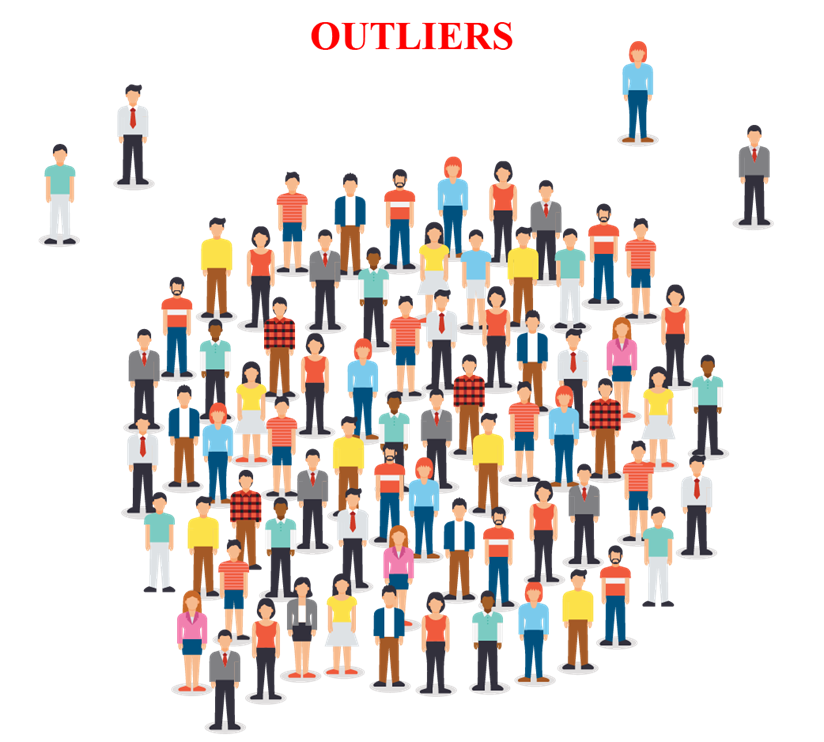

<div class="alert alert-block alert-info">

## Outliers

> In statistics, an outlier is a data point that differs significantly from other observations.An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.

## Dealing with outliers
> Once you’ve identified outliers, you’ll decide what to do with them in your dataset. Your main options are retaining or removing them.

> In general, you should try to accept outliers as much as possible unless it’s clear that they represent errors or bad data.


## How to detect?
- with boxplots and histograms
- statistical methods like IQR, skewness, etc.

> To choose the best way to handle outliers one must have a good domain knowledge and information about where the data come from and what they mean ; it also depends on what analysis one is planning to perform.


</div>

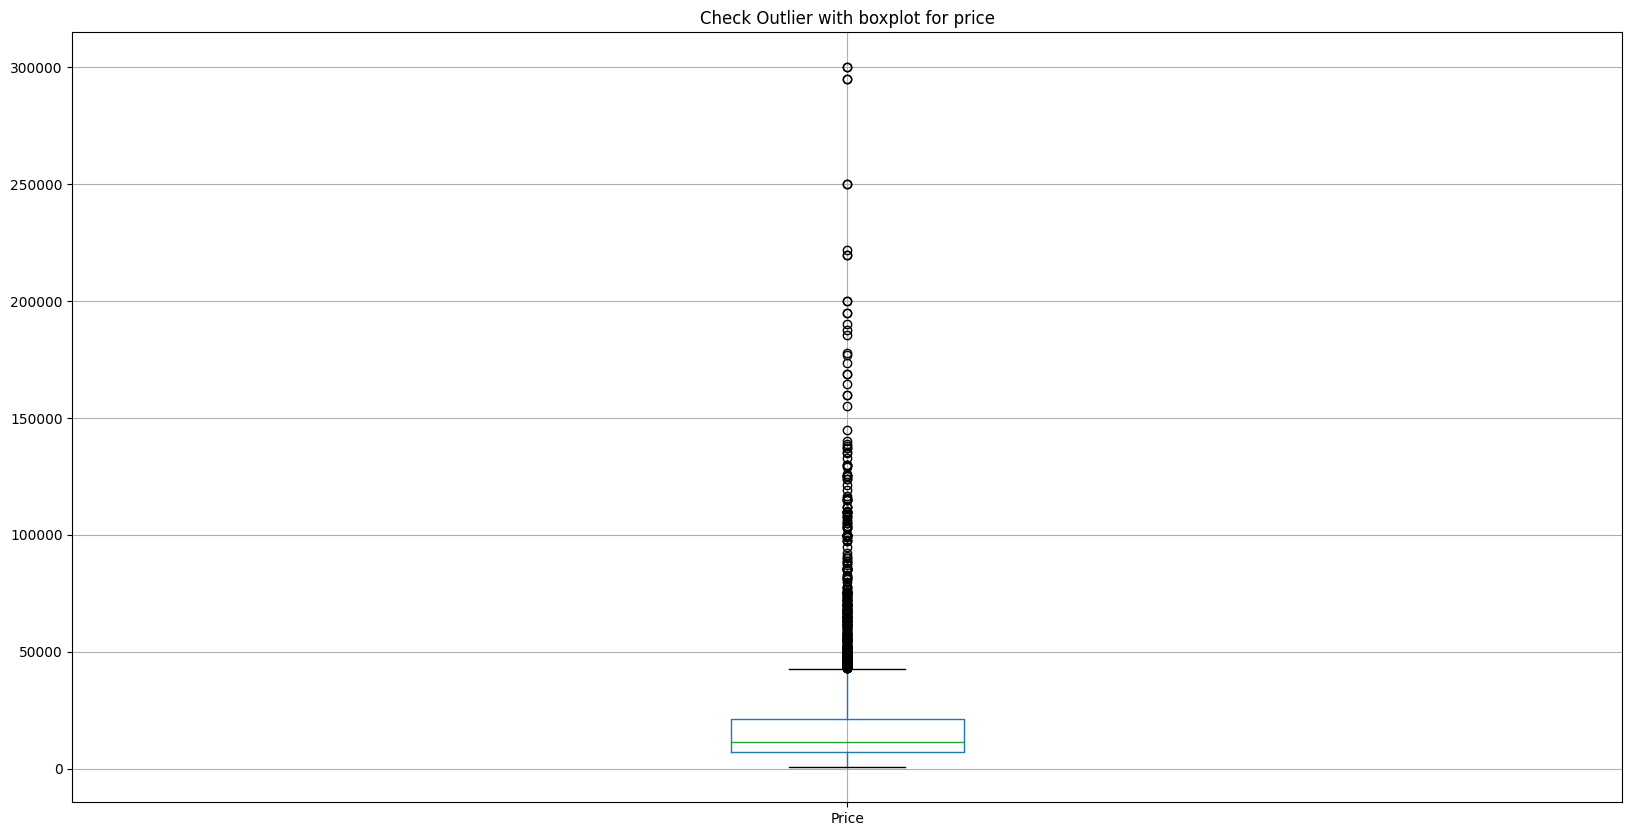

In [47]:
plt.figure(figsize=(20,10))
plt.title("Check Outlier with boxplot for price")
CarData.boxplot(column=['Price']);

In [48]:
# we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples

In [49]:
qPrice = CarData['Price'].quantile(0.99)
CarData = CarData[CarData['Price']<qPrice]

<Figure size 1100x500 with 0 Axes>

<Axes: xlabel='Price', ylabel='Density'>

Text(0.5, 1.0, 'Car Price Distribution Plot')

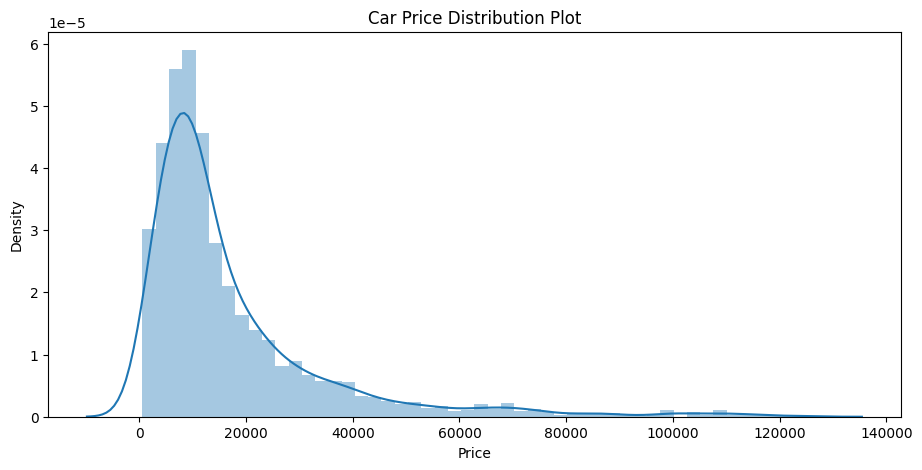

In [50]:
#check the PDF once again
plt.figure(figsize=[11,5])
sns.distplot(CarData['Price'])
plt.title('Car Price Distribution Plot')

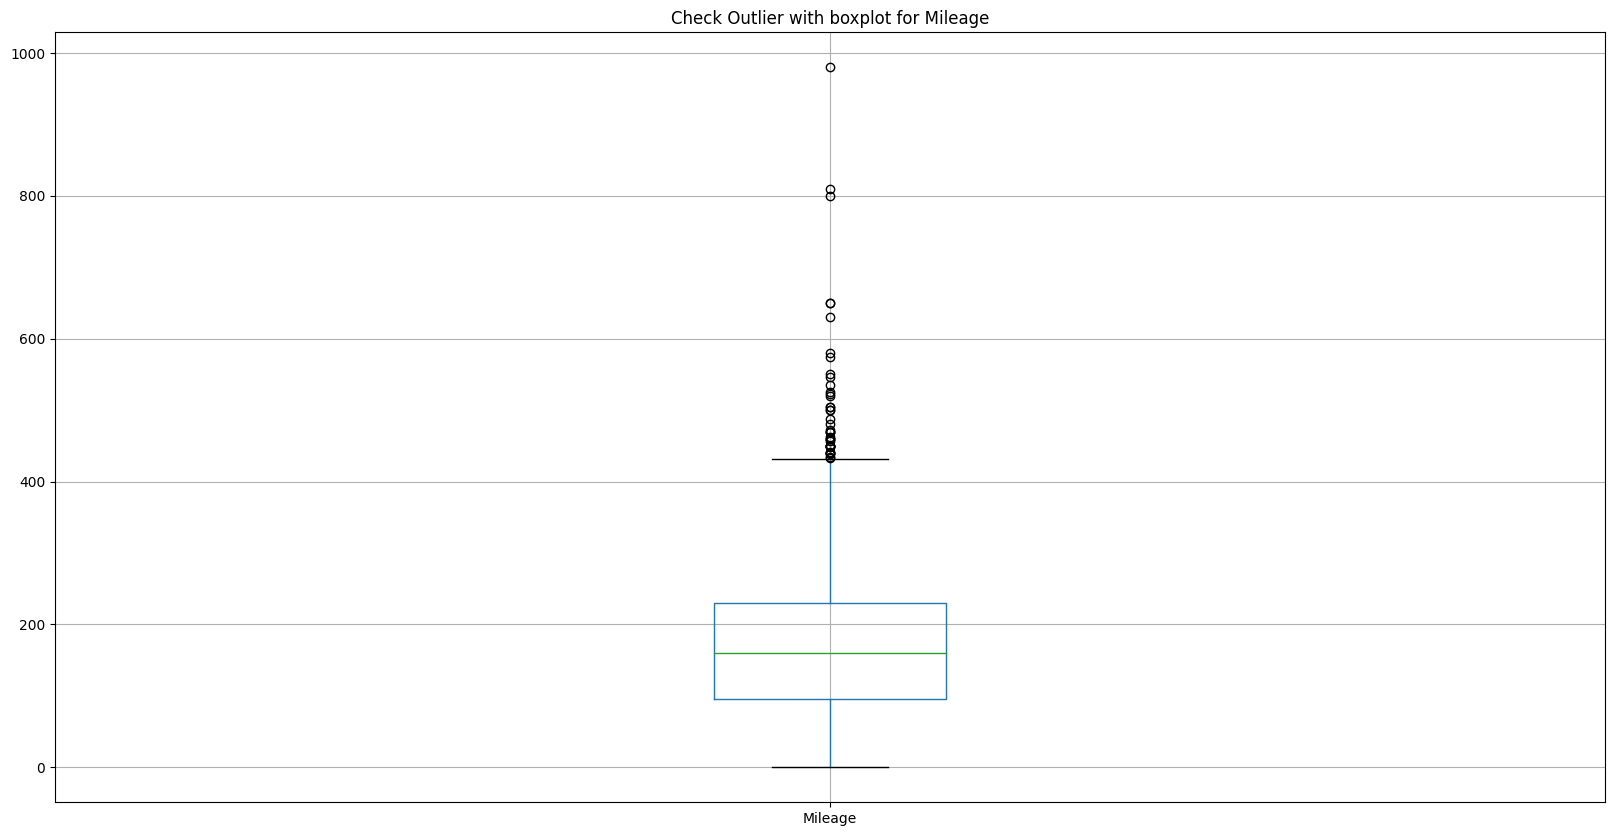

In [51]:
plt.figure(figsize=(20,10))
plt.title("Check Outlier with boxplot for Mileage")
CarData.boxplot(column=['Mileage']);

In [52]:
qMileage = CarData['Mileage'].quantile(0.99)
CarData = CarData[CarData['Mileage']<qMileage]

<Axes: xlabel='Mileage', ylabel='Density'>

Text(0.5, 1.0, 'Mileage Density')

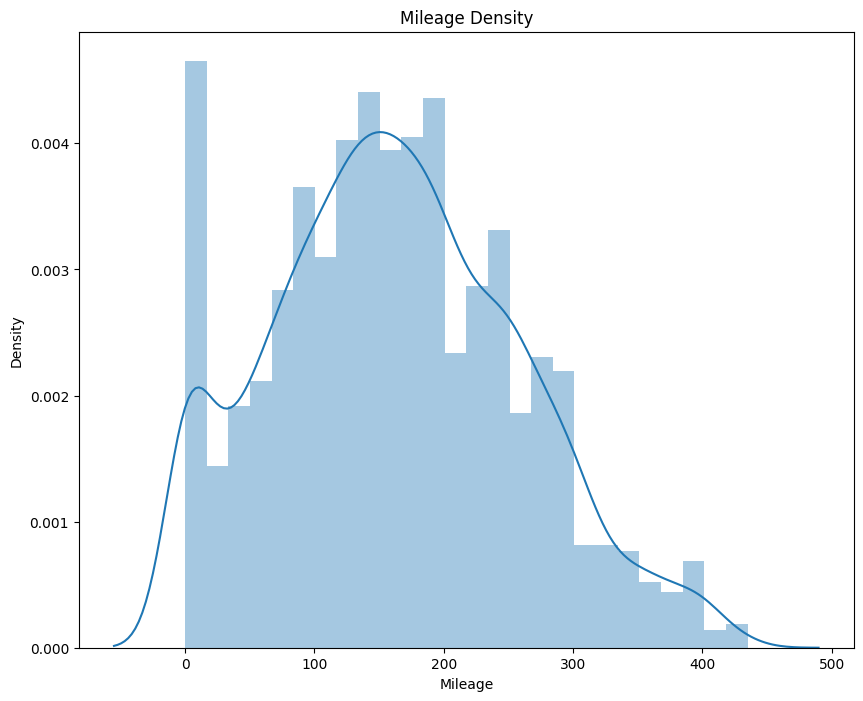

In [53]:
sns.distplot(CarData['Mileage'])
plt.title("Mileage Density")
plt.show()

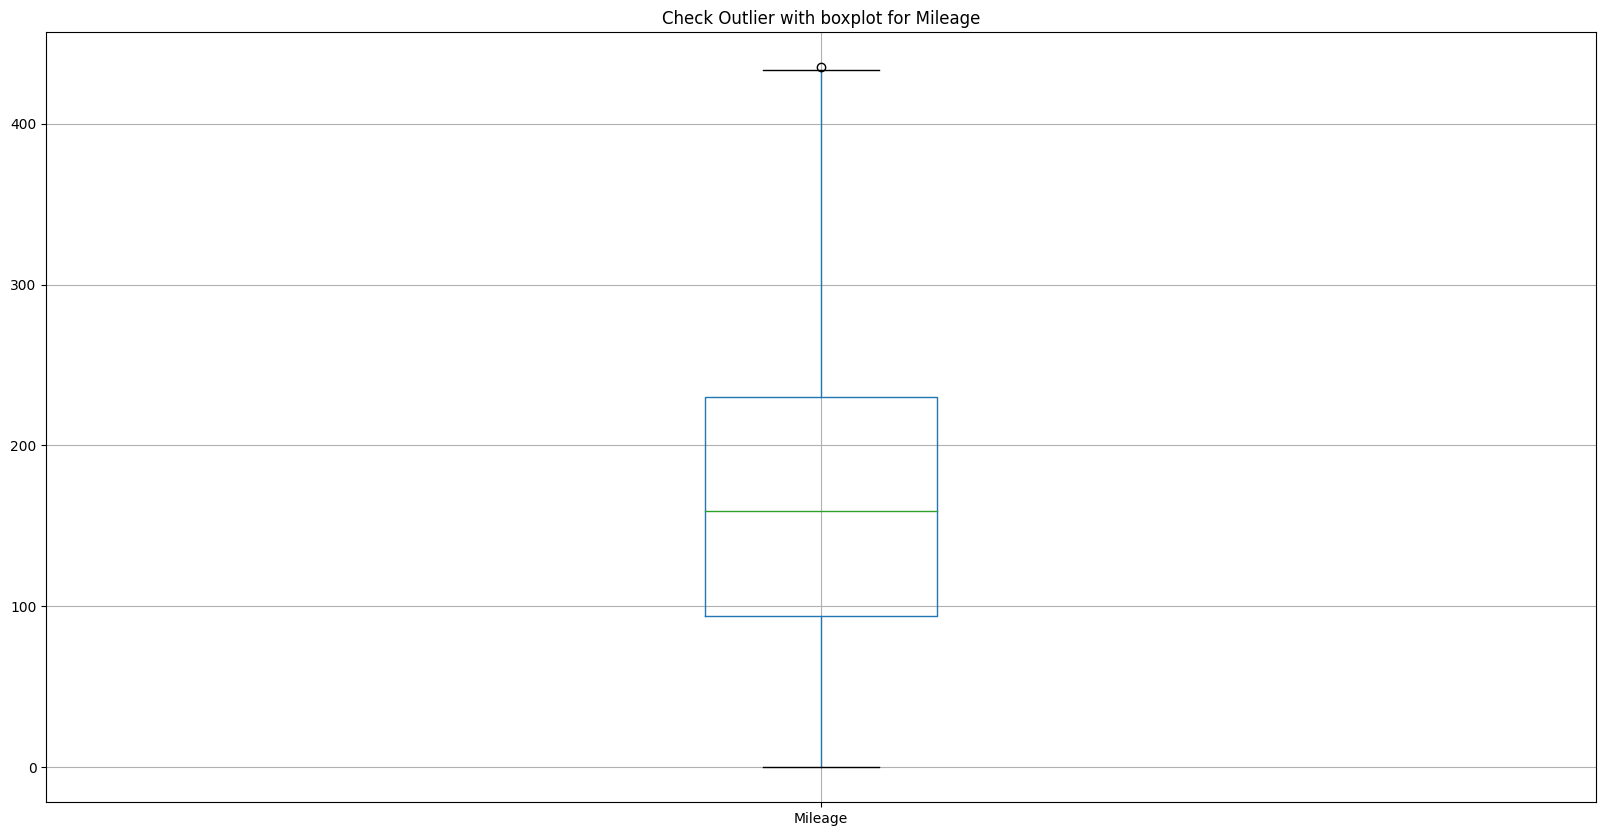

In [54]:
plt.figure(figsize=(20,10))
plt.title("Check Outlier with boxplot for Mileage")
CarData.boxplot(column=['Mileage']);

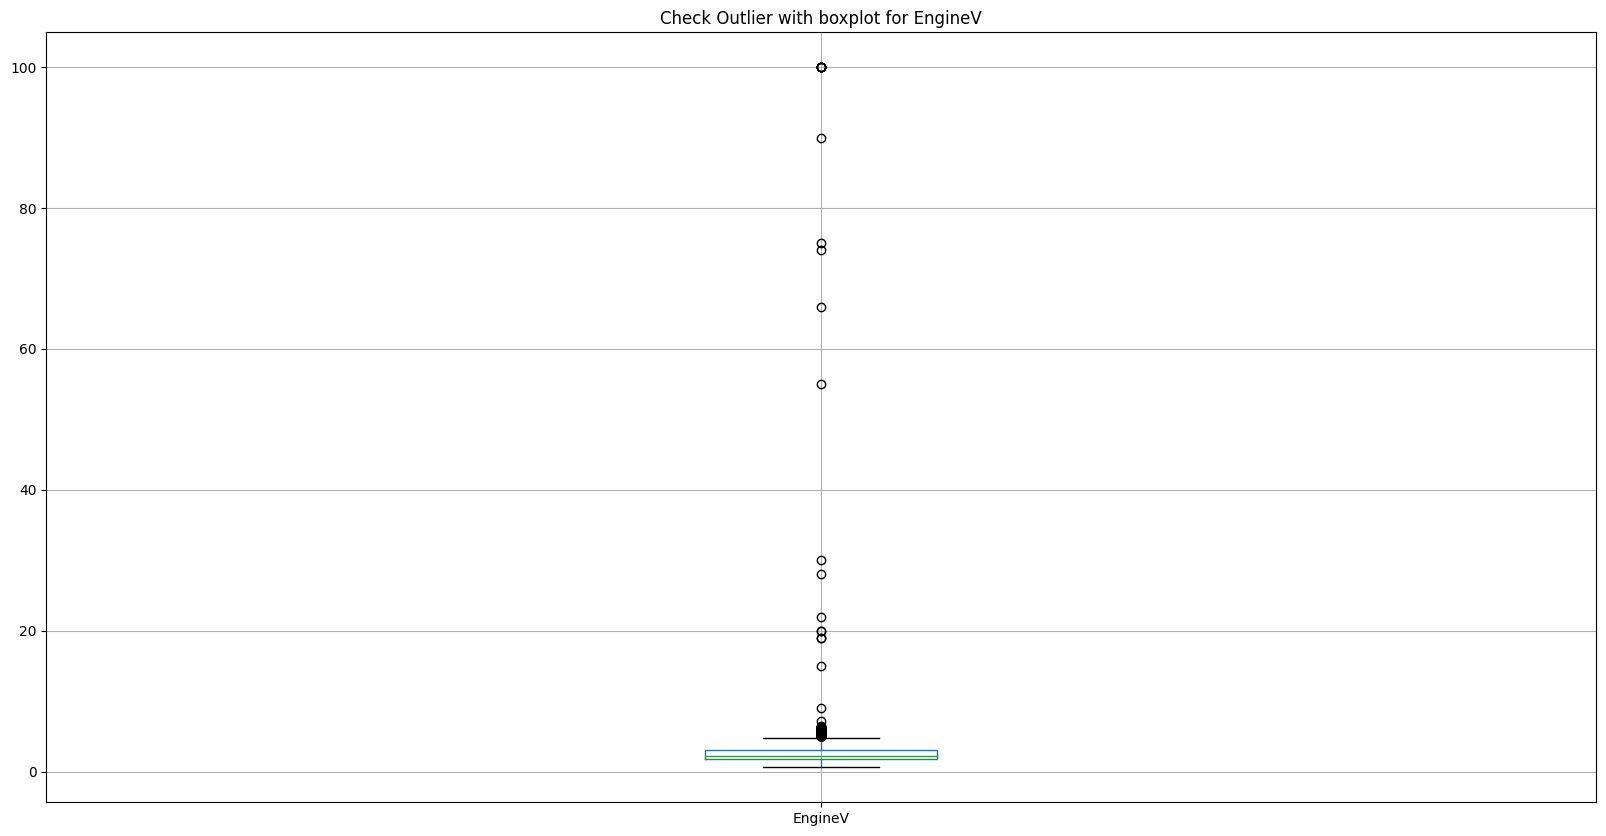

In [55]:
plt.figure(figsize=(20,10))
plt.title("Check Outlier with boxplot for EngineV")
CarData.boxplot(column=['EngineV']);

In [56]:
CarData = CarData[CarData['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Density'>

Text(0.5, 1.0, 'EngineV Density')

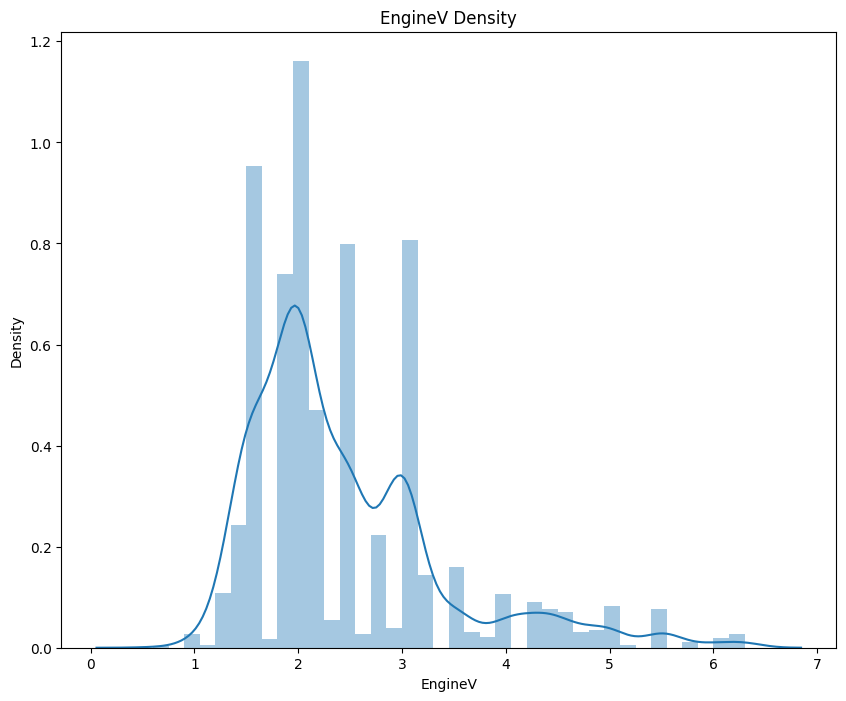

In [57]:
sns.distplot(CarData['EngineV'])
plt.title("EngineV Density")
plt.show()

In [58]:
CarData = CarData.reset_index(drop=True)

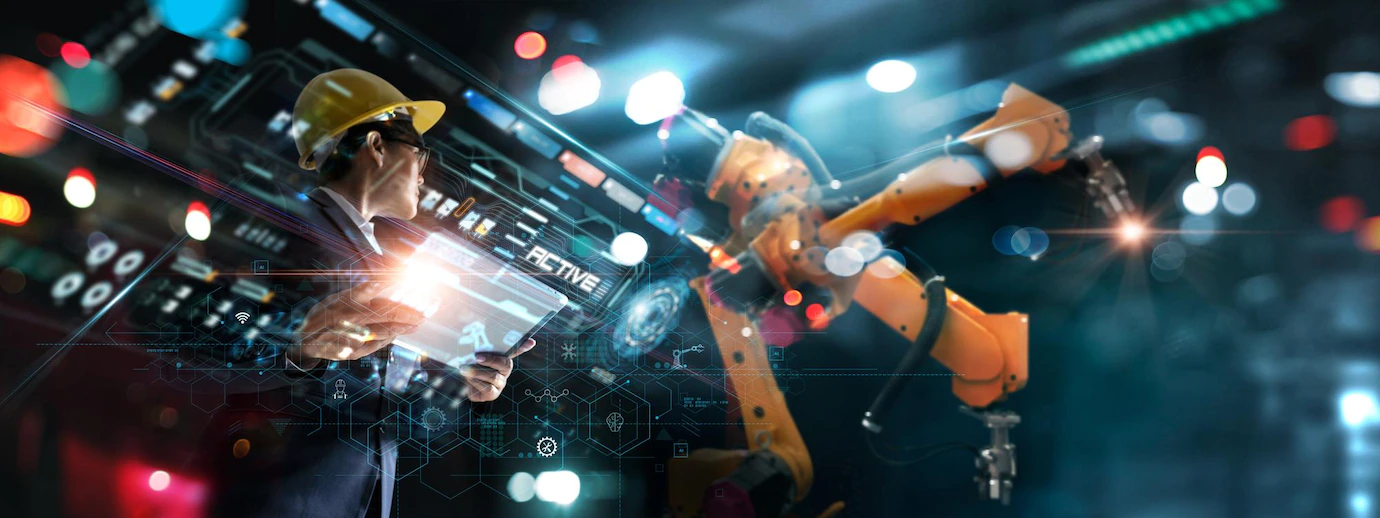

<div class="alert alert-block alert-info">

<p><b> Create SnapShot From Data </b>
<p> copying original data set is good practice when you're experimenting with things
<p> so you don't have to run all the cells before when you mess up something

</div>

In [59]:
CarData.sample(3)

Brand   Price       Body  Mileage  EngineV Fuel_Type  \
1446           Audi    3800      Sedan      257     2.00    Petrol   
876   Mercedes-Benz  105000  Crossover        1     3.00    Diesel   
1287            BMW   34500  Crossover       85     3.00    Petrol   

     Registration    Model  Age  
1446          yes       80   25  
876           yes  GLS 350    2  
1287          yes       X5    8

In [60]:
CarData_original = CarData.copy()

In [61]:
# CarData = CarData_original.copy()

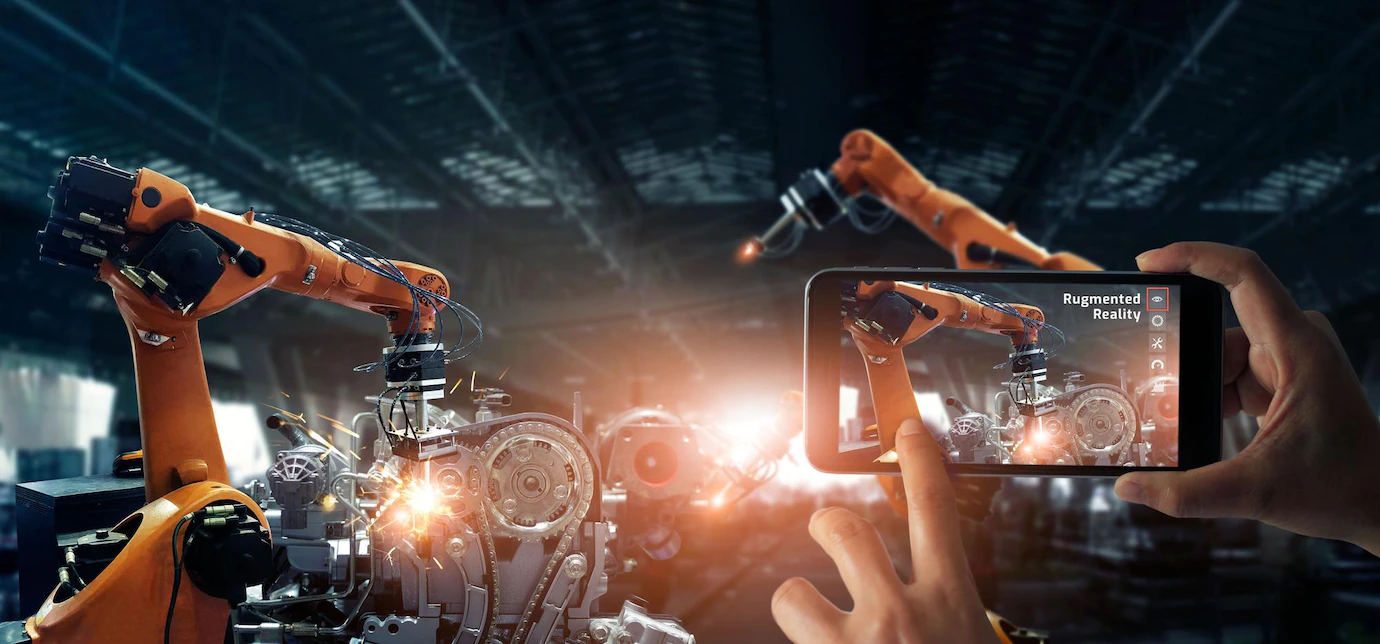

<div class="alert alert-block alert-info">
    
## Visualising the Data

</div>



<Figure size 1500x700 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

Text(0.5, 1.0, 'Brand Count')

<Axes: title={'center': 'Brand Count'}, xlabel='Brand', ylabel='count'>

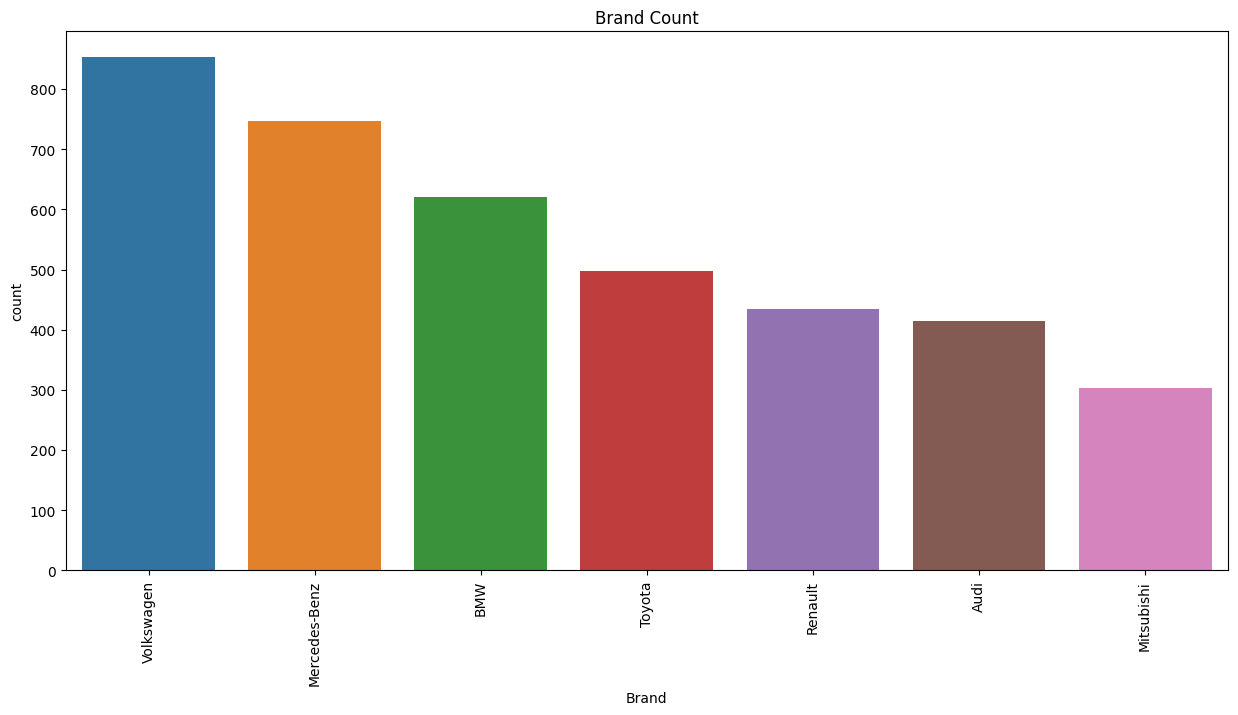

In [62]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 90)
plt.title("Brand Count")
order = CarData['Brand'].value_counts(ascending=False).index
sns.countplot(x='Brand', data=CarData, order=order)


<Figure size 1500x700 with 0 Axes>

Text(0.5, 1.0, 'Brand VS Price')

<Axes: title={'center': 'Brand VS Price'}, xlabel='Brand', ylabel='Price'>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Audi'),
  Text(1, 0, 'BMW'),
  Text(2, 0, 'Mercedes-Benz'),
  Text(3, 0, 'Mitsubishi'),
  Text(4, 0, 'Renault'),
  Text(5, 0, 'Toyota'),
  Text(6, 0, 'Volkswagen')])

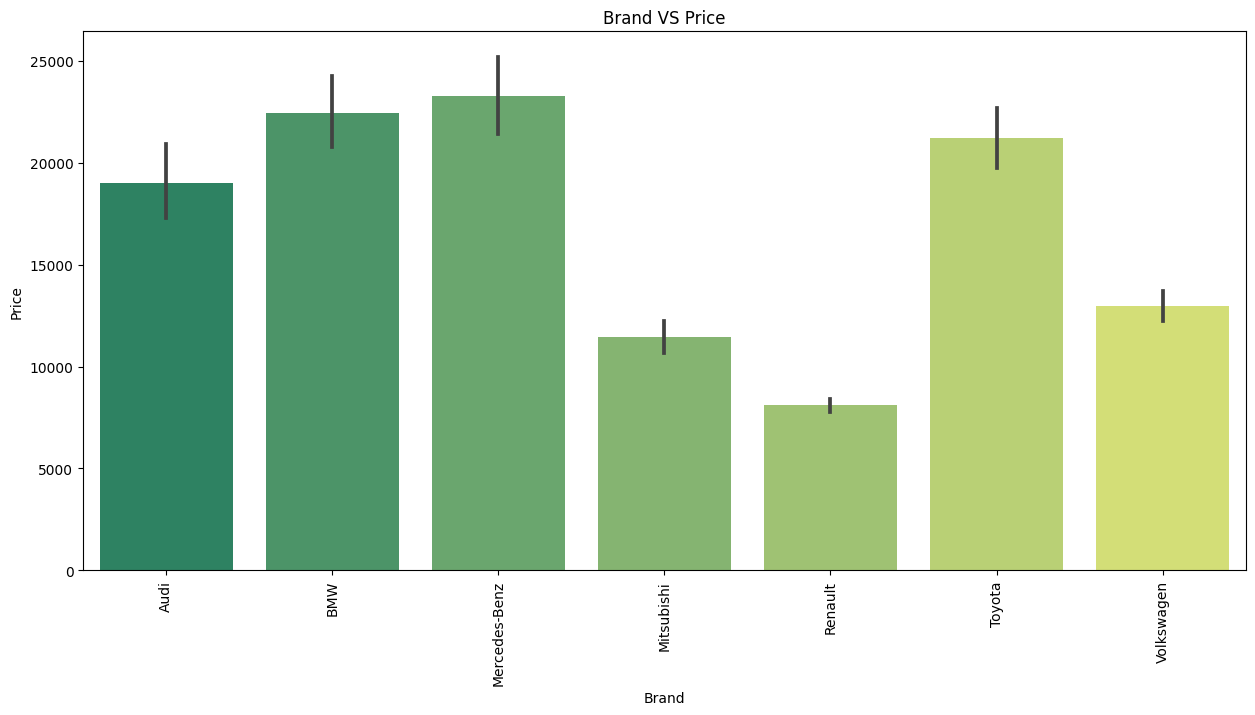

In [63]:
plt.figure(figsize=(15, 7))
plt.title("Brand VS Price")
sns.barplot(x="Brand", y="Price", data=CarData, palette='summer')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.show()

<Axes: ylabel='Brand'>

Text(0.5, 1.0, 'Brand pie Chart')

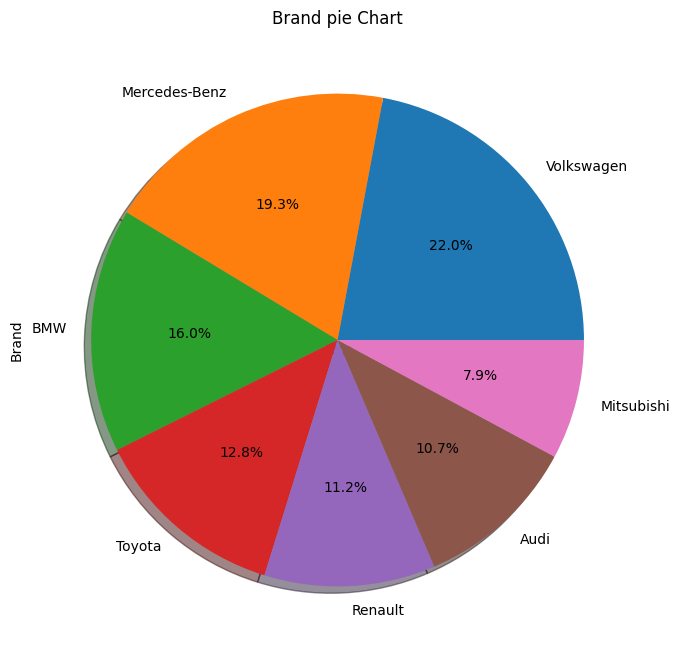

In [64]:
CarData['Brand'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("Brand pie Chart")

<Figure size 1500x700 with 0 Axes>

Text(0.5, 1.0, 'Fuel Type VS Price')

<Axes: title={'center': 'Fuel Type VS Price'}, xlabel='Fuel_Type', ylabel='Price'>

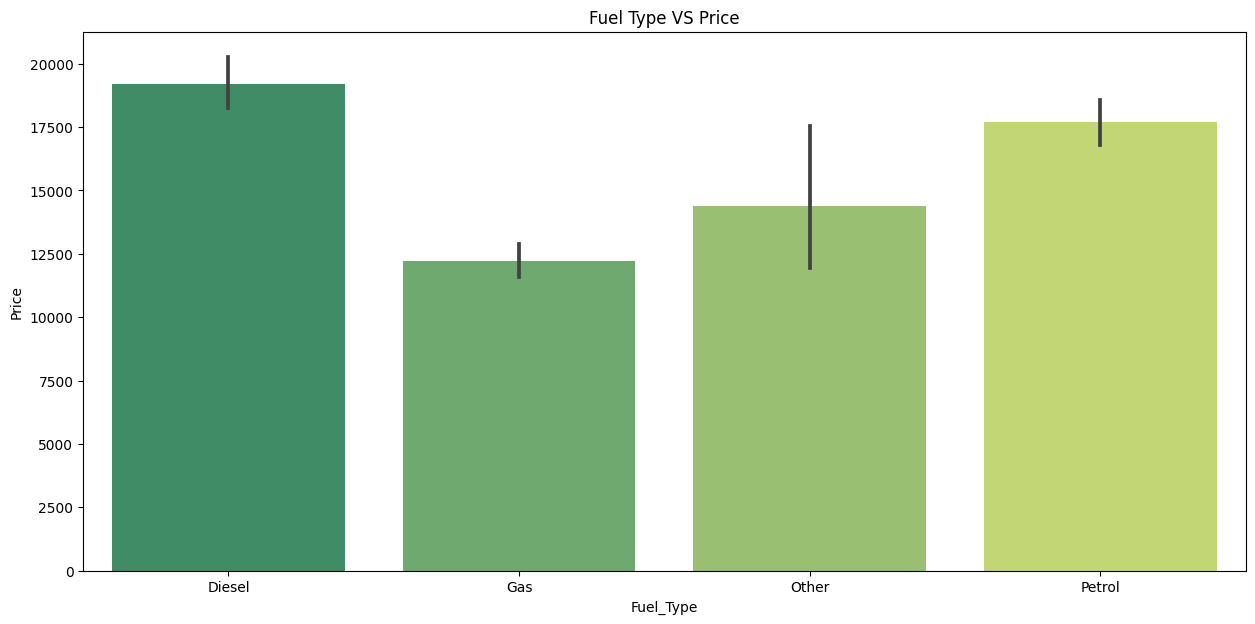

In [65]:
plt.figure(figsize=(15, 7))
plt.title("Fuel Type VS Price")
sns.barplot(x="Fuel_Type", y="Price", data=CarData, palette='summer')
plt.show()

<Figure size 1500x700 with 0 Axes>

<Axes: xlabel='Brand', ylabel='Price'>

Text(0.5, 1.0, 'Brand VS Price VS Fuel Type')

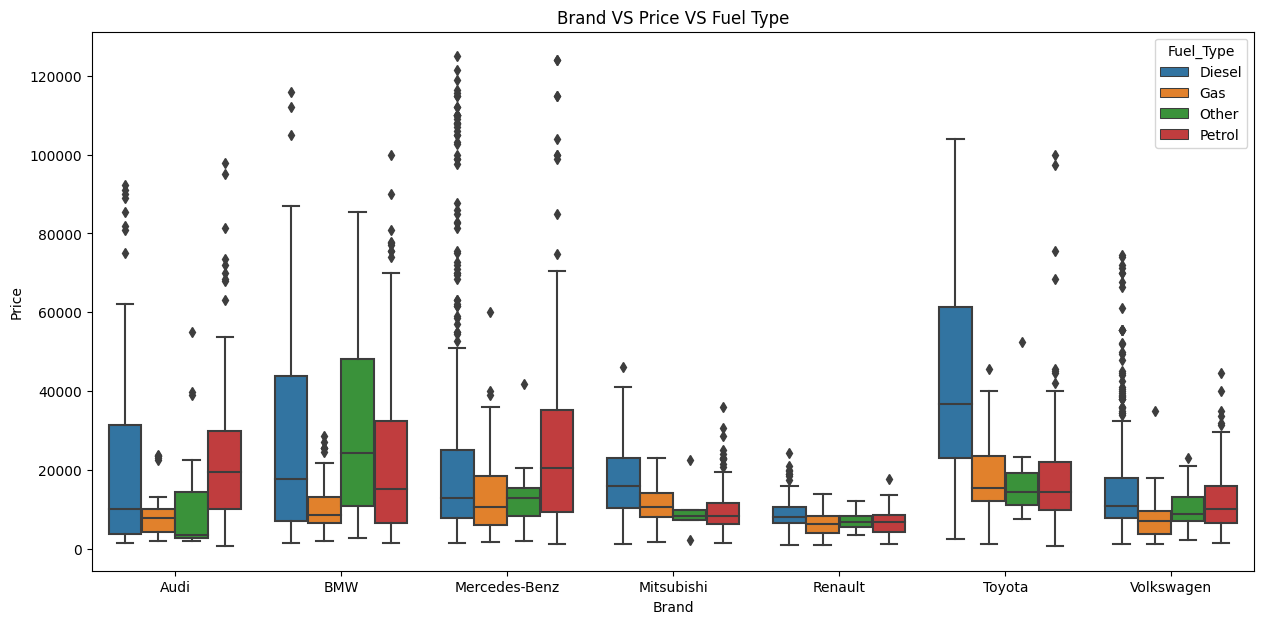

In [66]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'Brand', y = 'Price', hue = 'Fuel_Type', data = CarData)
plt.title('Brand VS Price VS Fuel Type')
plt.show()

<Figure size 1500x700 with 0 Axes>

Text(0.5, 1.0, 'Body Type VS Price')

<Axes: title={'center': 'Body Type VS Price'}, xlabel='Body', ylabel='Price'>

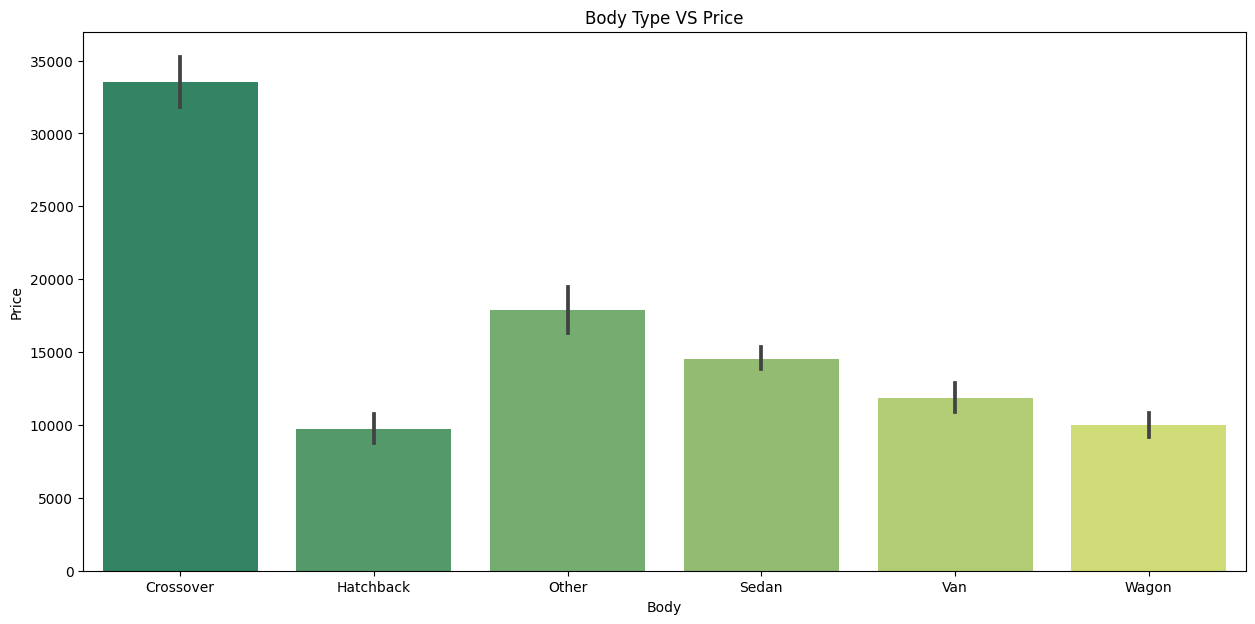

In [67]:
plt.figure(figsize=(15, 7))
plt.title("Body Type VS Price")
sns.barplot(x="Body", y="Price", data=CarData, palette='summer')
plt.show()

<Figure size 1500x700 with 0 Axes>

<Axes: xlabel='Body', ylabel='Price'>

Text(0.5, 1.0, 'Brand VS Price VS Body Type')

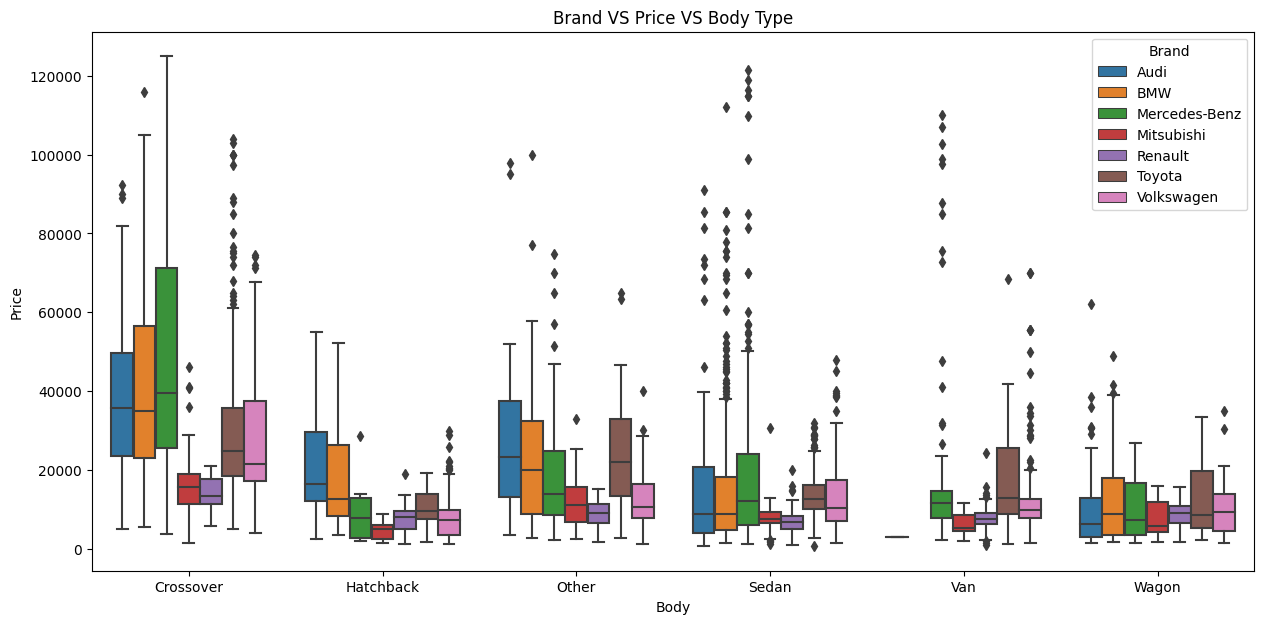

In [68]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'Body', y = 'Price', hue = 'Brand', data = CarData)
plt.title('Brand VS Price VS Body Type')
plt.show()

<Figure size 1500x700 with 0 Axes>

Text(0.5, 1.0, 'Age VS Price')

<Axes: title={'center': 'Age VS Price'}, xlabel='Age', ylabel='Price'>

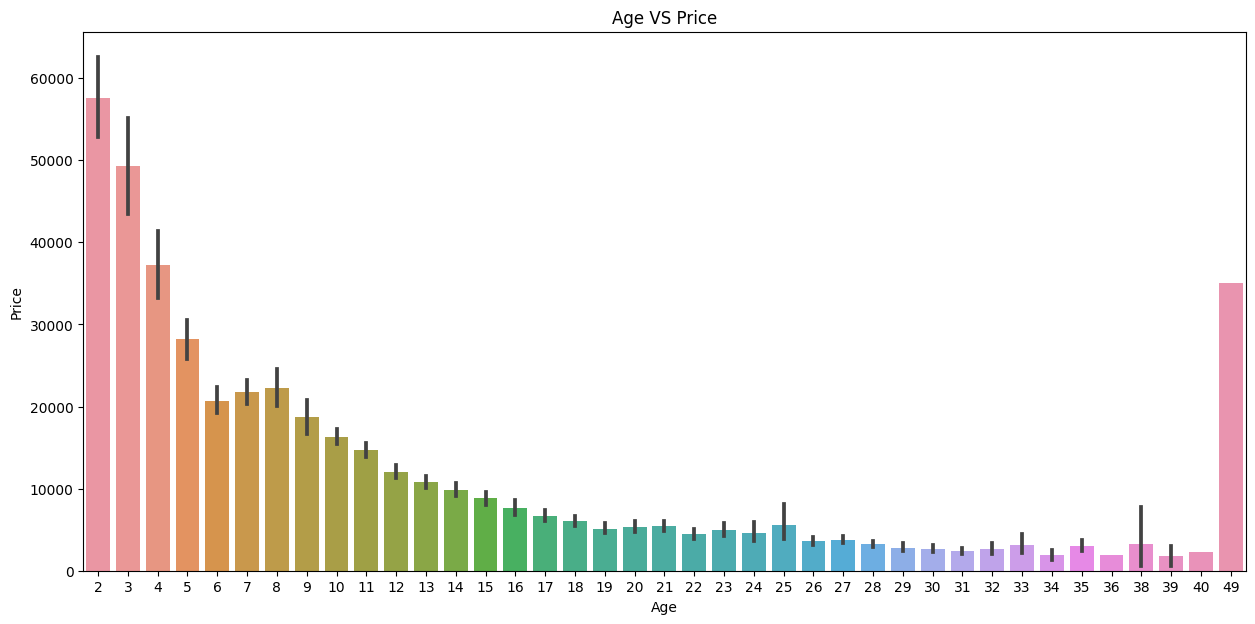

In [69]:
plt.figure(figsize=(15, 7))
plt.title("Age VS Price")
sns.barplot(x='Age', y='Price', data=CarData)
plt.show()

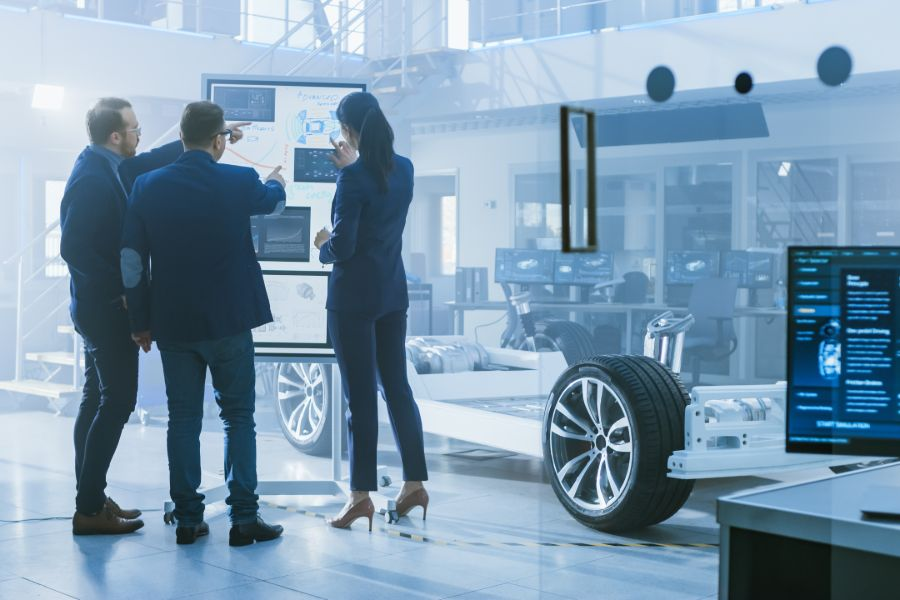

<div class="alert alert-block alert-info">

# Data Preparation

</div>


<Axes: xlabel='Price', ylabel='Density'>

Text(0.5, 1.0, 'Price data distribution')

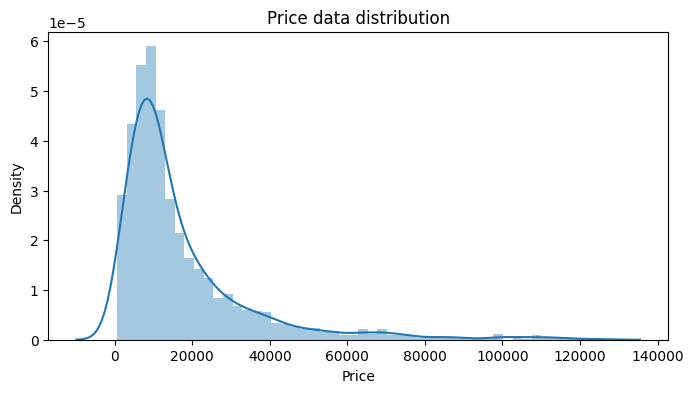

In [70]:
fig=plt.figure(figsize=(8,4))
sns.distplot(CarData['Price'])
plt.title('Price data distribution')

<div class="alert alert-block alert-info">

See The patterns are quite exponentials in this condition log transformation is a common way to deal with this issue. log transformation is especially useful when facing exponential scatter plots like we do now.
    
</div>



In [71]:
# Let's transform 'Price' with a log transformation
log_price = np.log(CarData['Price'])

# Then we add it to our data frame
CarData['Price_log'] = log_price
CarData.head()

Brand  Price       Body  Mileage  EngineV Fuel_Type Registration  \
0            BMW   4200      Sedan      277     2.00    Petrol          yes   
1  Mercedes-Benz   7900        Van      427     2.90    Diesel          yes   
2  Mercedes-Benz  13300      Sedan      358     5.00       Gas          yes   
3           Audi  23000  Crossover      240     4.20    Petrol          yes   
4         Toyota  18300  Crossover      120     2.00    Petrol          yes   

          Model  Age  Price_log  
0           320   27       8.34  
1  Sprinter 212   19       8.97  
2         S 500   15       9.50  
3            Q7   11      10.04  
4         Rav 4    7       9.81

<Axes: xlabel='Price_log', ylabel='Density'>

Text(0.5, 1.0, 'Price data distribution')

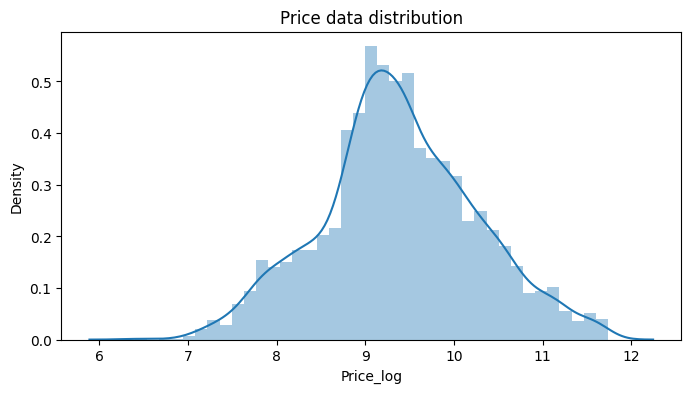

In [72]:
fig=plt.figure(figsize=(8,4))
sns.distplot(CarData['Price_log'])
plt.title('Price data distribution')

In [73]:
CarData['Model'].unique()

array(['320', 'Sprinter 212', 'S 500', 'Q7', 'Rav 4', 'A6', 'Megane',
       'Golf IV', '19', 'A6 Allroad', 'Passat B6', 'Land Cruiser 100',
       'Clio', '318', 'Hilux', 'Polo', 'Outlander', 'A8', 'Touareg',
       'Vito', 'Colt', '100', 'Z4', 'Pajero Wagon', 'X5', 'Caddy',
       'Camry', '528', 'TT', 'G 55 AMG', 'X6', 'Galant', '525', 'Kangoo',
       'ML 350', '730', 'Trafic', 'S 350', 'Lancer', 'E-Class', 'Scenic',
       '330', 'Passat B5', 'A3', 'Land Cruiser Prado', 'Caravelle',
       'Avensis', 'GL 320', 'GL 450', 'Lancer X', '200', '520', 'Tiguan',
       'Outlander XL', 'GLS 350', 'A5', 'X6 M', 'Golf III', 'A 150',
       'FJ Cruiser', 'Koleos', 'Passat B7', 'Scirocco', 'M5', 'Venza',
       '80', 'V 250', 'ML 270', 'C-Class', 'Lupo', '5 Series', 'CLA 200',
       'T5 (Transporter)', 'Highlander', 'Corolla', 'CLK 240', 'I3',
       'Land Cruiser 200', 'Multivan', 'Vaneo', 'X1', 'T5 (Transporter) ',
       'S 400', 'S 550', 'Passat CC', 'A4 Allroad', 'Passat B4',
       'Go

In [74]:
CarData.drop('Model', axis=1, inplace=True)

In [75]:
CarData.sample(5)

Brand  Price       Body  Mileage  EngineV Fuel_Type Registration  \
3703      Toyota  61990  Crossover       68     4.50    Diesel          yes   
865      Renault  13400      Wagon      190     1.50    Diesel          yes   
1991  Volkswagen   8800      Other      217     1.90    Diesel          yes   
3184      Toyota  10200      Sedan      185     1.80    Petrol          yes   
2321  Volkswagen  30000      Sedan       67     2.00    Diesel          yes   

      Age  Price_log  
3703    6      11.03  
865     5       9.50  
1991   13       9.08  
3184   11       9.23  
2321    5      10.31

<div class="alert alert-block alert-info">
<p><b> Creating encoding column for categoricol columns only
</div>

In [76]:
le = LabelEncoder() # creating an instance of the LabelEncoder

# Brand column
CarData['Brand_enc'] = le.fit_transform(CarData['Brand'])
BrandDic=dict()
for num, lable in enumerate(le.classes_):
    BrandDic[lable] = num

# Body column
CarData['Body_enc']= le.fit_transform(CarData['Body'])
BodyDic=dict()
for num, lable in enumerate(le.classes_):
    BodyDic[lable] = num

#Engine type
CarData['Fuel_Type_enc' ] = le.fit_transform(CarData['Fuel_Type'])
FuelDic=dict()
for num, lable in enumerate(le.classes_):
    FuelDic[lable] = num

#Registration column
CarData['Registration_enc'] = le.fit_transform(CarData['Registration'])
RegDic=dict()
for num, lable in enumerate(le.classes_):
    RegDic[lable] = num

In [77]:
BrandDic

{'Audi': 0,
 'BMW': 1,
 'Mercedes-Benz': 2,
 'Mitsubishi': 3,
 'Renault': 4,
 'Toyota': 5,
 'Volkswagen': 6}

In [78]:
BodyDic

{'Crossover': 0, 'Hatchback': 1, 'Other': 2, 'Sedan': 3, 'Van': 4, 'Wagon': 5}

In [79]:
FuelDic

{'Diesel': 0, 'Gas': 1, 'Other': 2, 'Petrol': 3}

In [80]:
RegDic

{'no': 0, 'yes': 1}

In [81]:
CarData.sample(5)

Brand  Price       Body  Mileage  EngineV Fuel_Type  \
583      Volkswagen   2200      Sedan      272     1.90    Diesel   
2820  Mercedes-Benz  13200        Van      260     2.20    Diesel   
579          Toyota  18990  Crossover       95     2.00    Petrol   
928      Volkswagen  11300        Van      165     1.90    Diesel   
1641     Volkswagen  17900        Van       92     1.40    Petrol   

     Registration  Age  Price_log  Brand_enc  Body_enc  Fuel_Type_enc  \
583            no   20       7.70          6         3              0   
2820          yes   10       9.49          2         4              0   
579           yes    7       9.85          5         0              3   
928           yes    8       9.33          6         4              0   
1641          yes    6       9.79          6         4              3   

      Registration_enc  
583                  0  
2820                 1  
579                  1  
928                  1  
1641                 1

In [82]:
CarData_Encoded = CarData.copy()

<div class="alert alert-block alert-info">
<p><b> droping the old categorical column
</div>

In [83]:
CarData.drop(['Brand' , 'Body', 'Fuel_Type', 'Registration','Price'], axis=1, inplace=True)
CarData.head()

Mileage  EngineV  Age  Price_log  Brand_enc  Body_enc  Fuel_Type_enc  \
0      277     2.00   27       8.34          1         3              3   
1      427     2.90   19       8.97          2         4              0   
2      358     5.00   15       9.50          2         3              1   
3      240     4.20   11      10.04          0         0              3   
4      120     2.00    7       9.81          5         0              3   

   Registration_enc  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

<Figure size 2000x2000 with 0 Axes>

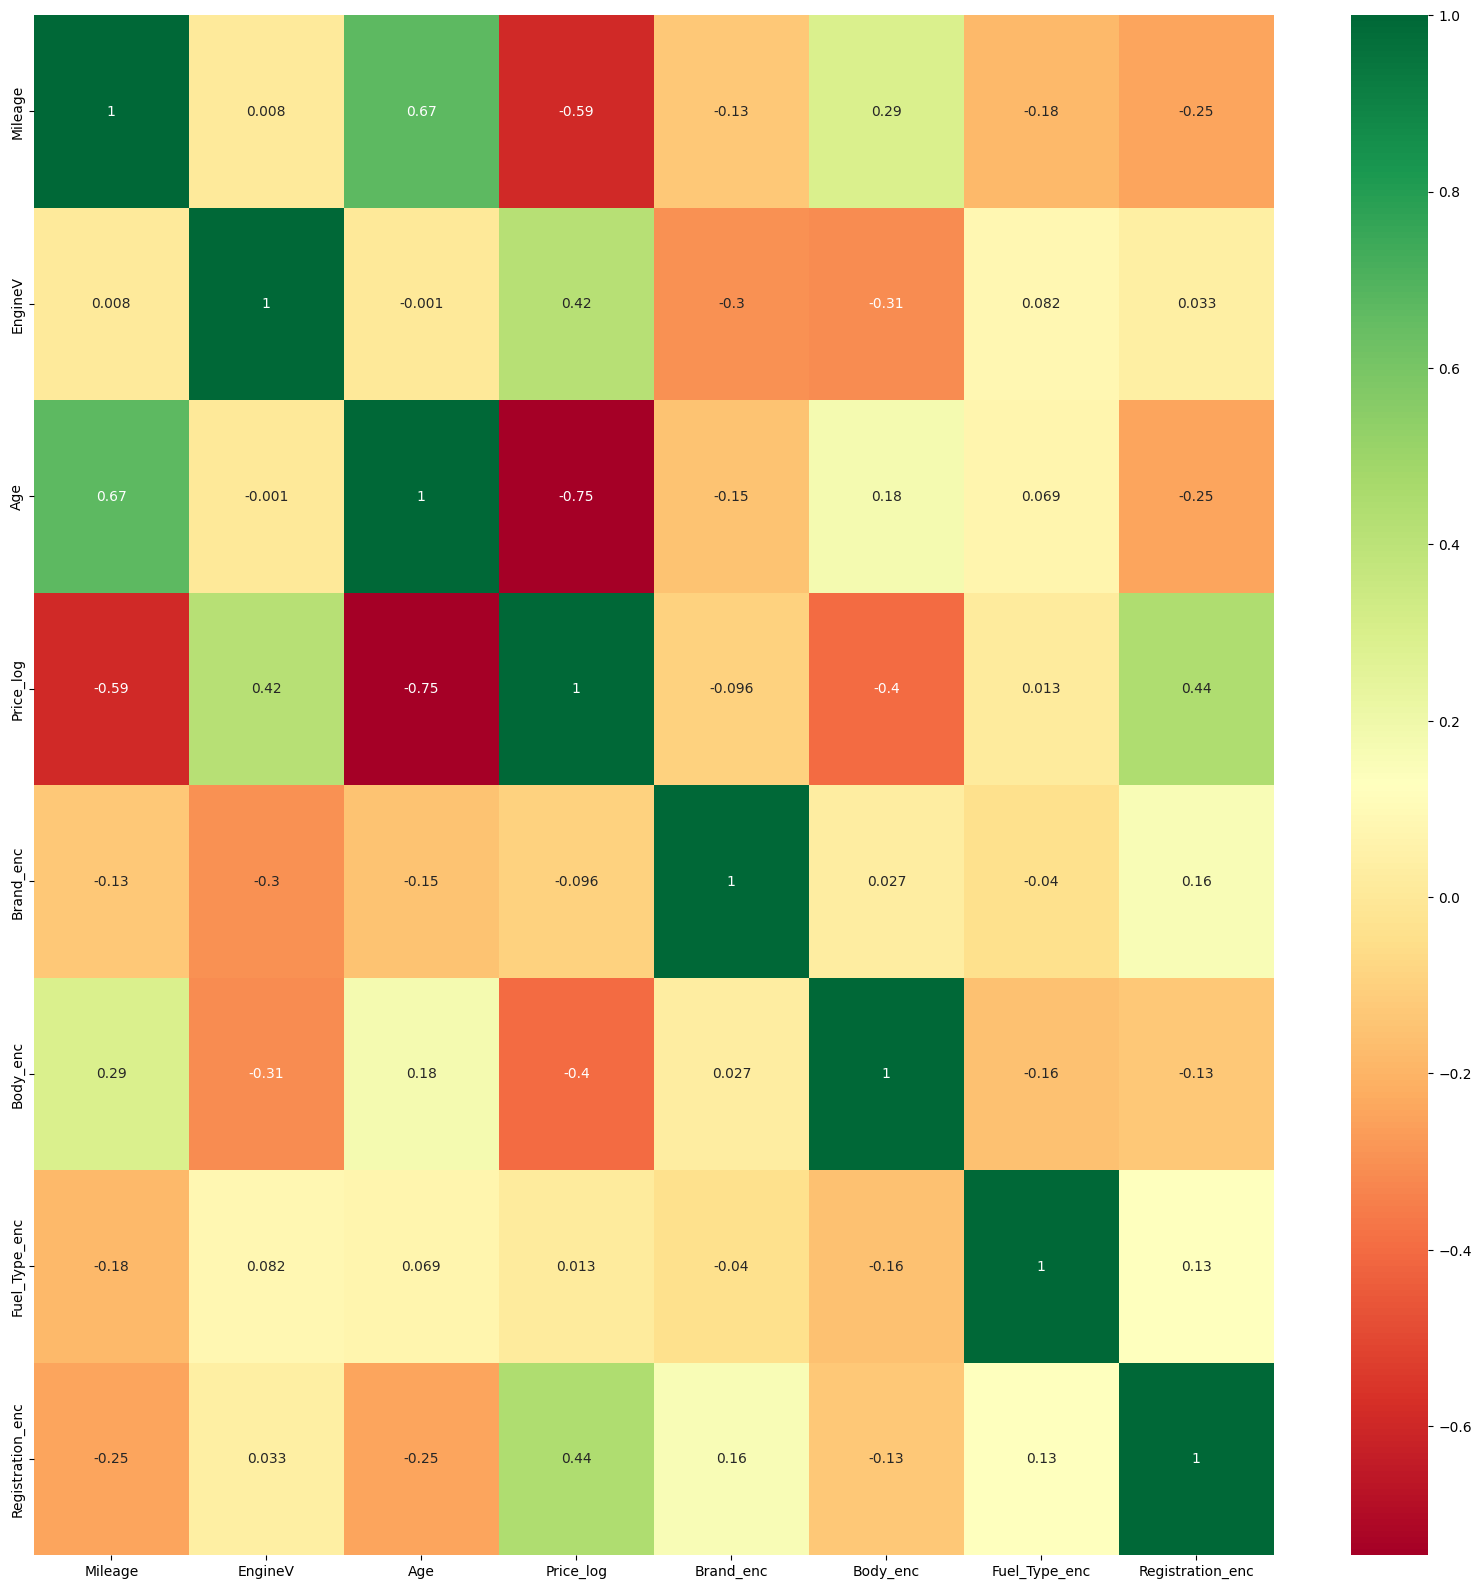

In [84]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = CarData.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map of the corerlation of the features
g=sns.heatmap(CarData[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")
#annot = true will write the data in each cell.
#cmap sets the color of the maps

In [85]:
CarData.drop('Age', axis=1,inplace=True)

In [86]:
CarData.sample()

Mileage  EngineV  Price_log  Brand_enc  Body_enc  Fuel_Type_enc  \
2861      144     1.60       9.38          6         3              1   

      Registration_enc  
2861                 1

<div class="alert alert-block alert-info">
<p><b> Splitting the Data into Training and Testing Sets
</div>


<div class="alert alert-block alert-info">

Now as It known theat tree based model are very powerfull and also the ensemble approch RandomForest is very
powerfull and mostely used machine learning algorithms. the main advantage it is not required longer data
preprocessing. and aldo gives better result.
    
</div>

In [87]:
# takking X and y
X = CarData.drop('Price_log', axis=1)
y = CarData['Price_log']

In [88]:
# train test split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=1)

<div class="alert alert-block alert-info">

<p><b>Feature Importance</b>

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.
    
</div>

In [89]:
# Finding out the labels that has a much greater impact on the model.

In [90]:
ExtraTreesRegModel = ExtraTreesRegressor()
ExtraTreesRegModel.fit(X,y)

ExtraTreesRegressor()

<Figure size 1500x700 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'feature importances')

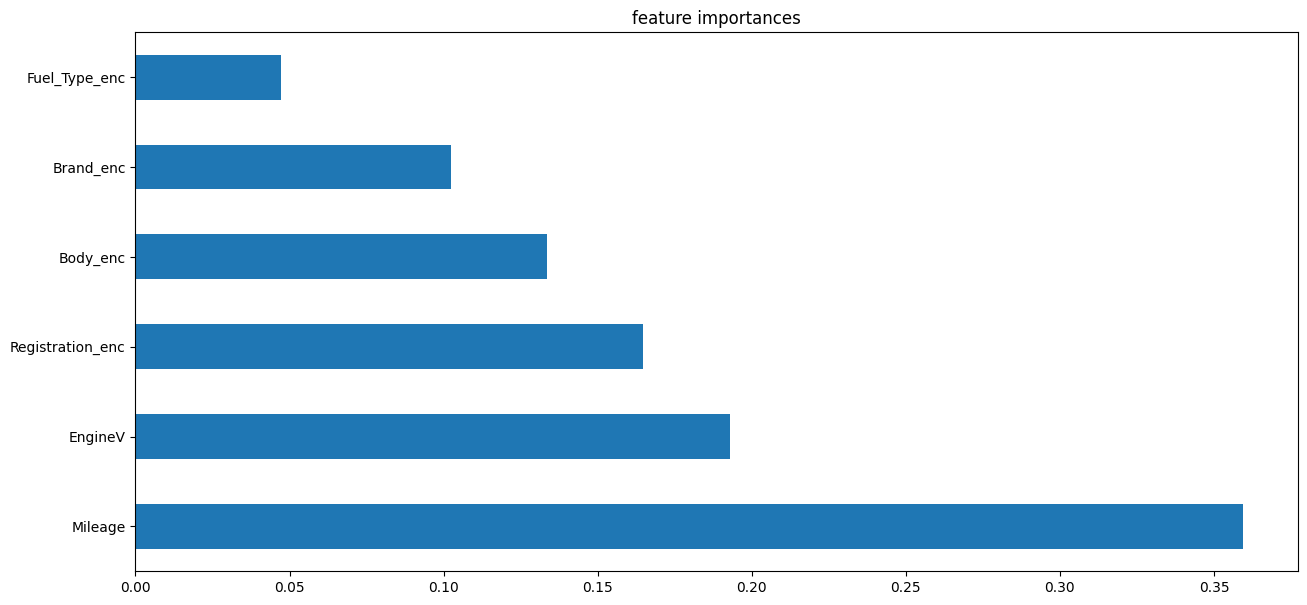

In [91]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[15,7])
feat_importances = pd.Series(ExtraTreesRegModel.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("feature importances")
plt.show()

In [92]:
print(feat_importances.sort_values(ascending=False))

Mileage            0.36
EngineV            0.19
Registration_enc   0.16
Body_enc           0.13
Brand_enc          0.10
Fuel_Type_enc      0.05
dtype: float64


Rescaling the Features
For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
Here, we will use Standardisation Scaling.

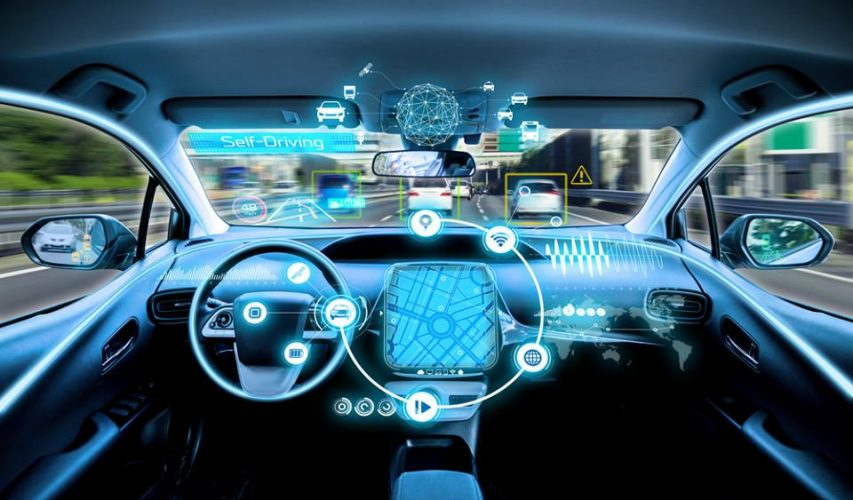

<div class="alert alert-block alert-danger">

<h1>Model Development

</div>

<div class="alert alert-block alert-info">

<p><b>LinearRegression</b>

<p>1-Create model
<p>2-Train model
<p>3-Predict using trained model
    
</div>

In [93]:
LinearRegModel = LinearRegression()
LinearRegModel.fit(X_train, y_train)

# Model Summary
y_pred_lr = LinearRegModel.predict(X_test)

LinearRegression()

In [94]:
# print (f'Traning r2_score: {r2_score(y_train, LinearRegModel.predict (X_train))}')
print (f'Testing r2_score: {r2_score(y_test, LinearRegModel.predict(X_test))}')

Testing r2_score: 0.671174689868044


In [95]:
LR_r2_score  =  r2_score(y_test,y_pred_lr)
LR_mse       =  mean_squared_error(y_test,y_pred_lr)
LR_rmse      =  np.sqrt(mean_squared_error(y_test,y_pred_lr))

print("R2 score :",LR_r2_score)
# print("mean squared error :",LR_mse)
# print("root mean squared error :",LR_rmse)

R2 score : 0.671174689868044


In [96]:
# SHAP Global interpretability

In [97]:
LinearExplainer = shap.Explainer(LinearRegModel,X_train)

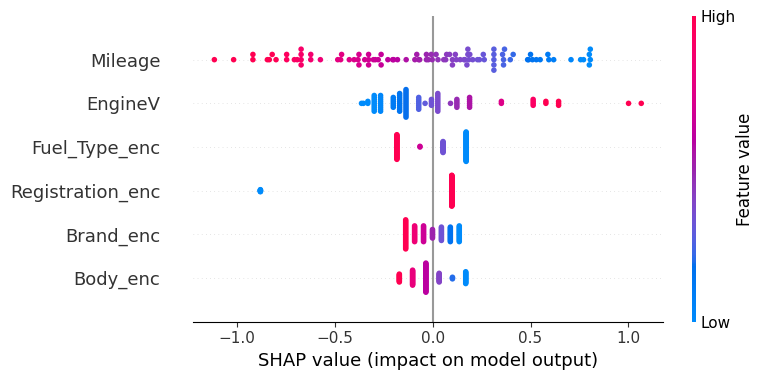

In [98]:
sample = X_test.sample(100)
L_shap_values = LinearExplainer.shap_values(sample)
shap.summary_plot(L_shap_values, sample,max_display=10)

<div class="alert alert-block alert-info">

<p><b>GradientBoostingRegressor</b>

<p>1-Create model
<p>2-Train model
<p>3-Predict using trained model
    
</div>

In [99]:
# Model Building
GradientBoostRegModel = GradientBoostingRegressor()

# Training Model
GradientBoostRegModel.fit(X_train,y_train)

# Model Summary
y_pred_gbt = GradientBoostRegModel.predict(X_test)

GradientBoostingRegressor()

In [100]:
print (f'Traning r2_score: {r2_score(y_train, GradientBoostRegModel.predict (X_train))}')
print (f'Testing r2_score: {r2_score(y_test, GradientBoostRegModel.predict(X_test))}')

Traning r2_score: 0.7943123836521865
Testing r2_score: 0.7661733673746745


In [101]:
GB_r2_score = r2_score(y_test,y_pred_gbt)
GB_rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("r2 score :",GB_r2_score)
# print("R mean squared error :",GB_rmse)

r2 score : 0.7661733673746745


In [102]:
GradientExplainer = shap.Explainer(GradientBoostRegModel)

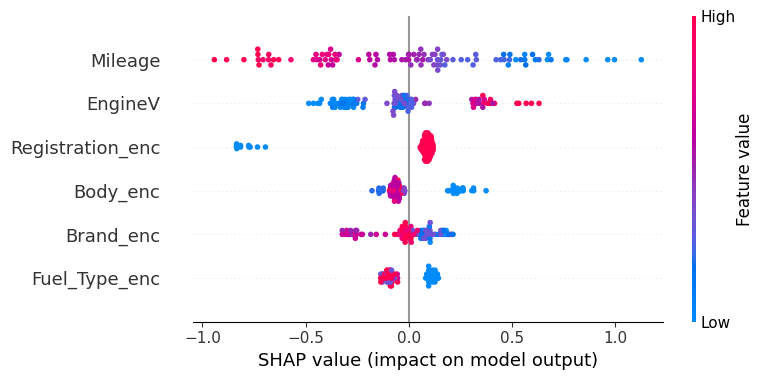

In [103]:
sample = X_test.sample(100)
G_shap_values = GradientExplainer.shap_values(sample)
shap.summary_plot(G_shap_values,sample,max_display=10)

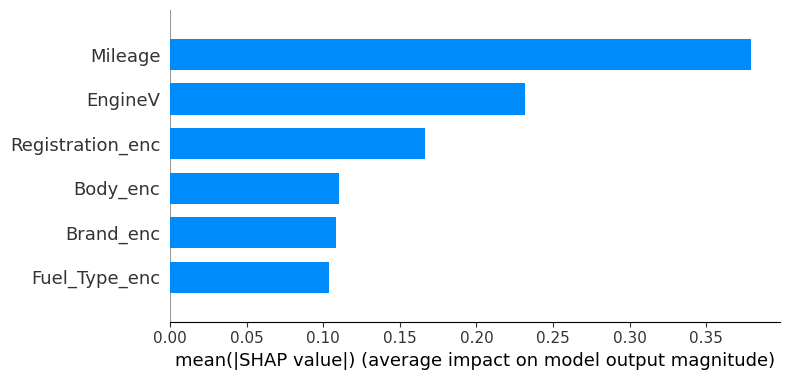

In [104]:
shap.summary_plot(G_shap_values, X, plot_type="bar")

In [105]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%']).head()
# df_ev.head(10)

Predicted Price  Actual Price  Residual  Difference%
574         30001.09      30000.00     -1.09         0.00
427          8946.15       8950.00      3.85         0.04
563          8509.78       8500.00     -9.78         0.12
552         12519.91      12499.00    -20.91         0.17
36          20045.08      20000.00    -45.08         0.23

<div class="alert alert-block alert-info">

<p><b>RandomForestRegressor</b>

<p>1-Create model
<p>2-Train model
<p>3-Predict using trained model
<p>4-Find good hyper-parameters
<p>5-Evaluate with selected hyper-parameters
    
</div>

In [106]:
# Model Building
RandomForestRegModel = RandomForestRegressor()

# Training Model
RandomForestRegModel.fit(X_train,y_train)

# Model Summary
y_pred_rf = RandomForestRegModel.predict(X_test)

RandomForestRegressor()

In [107]:
print (f'Traning r2_score: {r2_score(y_train, RandomForestRegModel.predict (X_train))}')
print (f'Testing r2_score: {r2_score(y_test, RandomForestRegModel.predict(X_test))}')

Traning r2_score: 0.9589196543239338
Testing r2_score: 0.7642341160338132


In [108]:
RF_r2_score = r2_score(y_test,y_pred_rf)
RF_rmse = mean_squared_error(y_test,y_pred_rf)
print("r2 score :",RF_r2_score)
print("R mean squared error :",RF_rmse)

r2 score : 0.7642341160338132
R mean squared error : 0.19597560833921998


In [109]:
RandomFExplainer = shap.TreeExplainer(RandomForestRegModel)

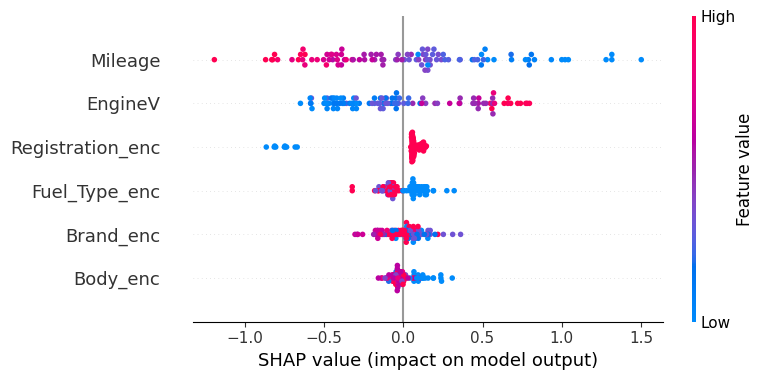

In [110]:
sample = X_test.sample(100)
R_shap_values = RandomFExplainer.shap_values(sample)
shap.summary_plot(R_shap_values, sample,max_display=10)

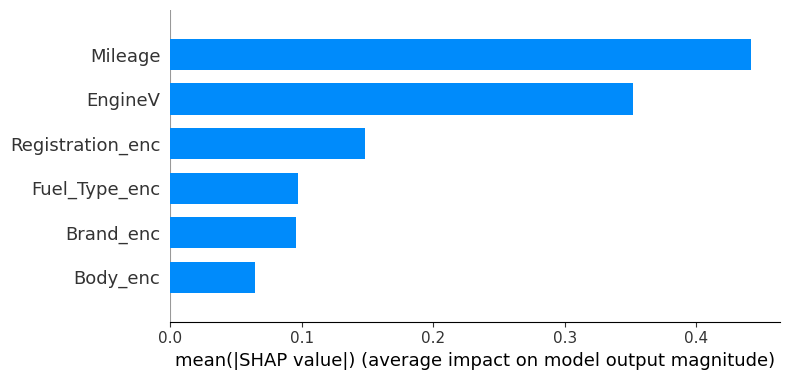

In [111]:
shap.summary_plot(R_shap_values, X, plot_type="bar")

In [112]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_rf), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%']).head()
# df_ev.head(10)

Predicted Price  Actual Price  Residual  Difference%
390          9949.17       9950.00      0.83         0.01
354          9296.42       9300.00      3.58         0.04
99           2902.19       2900.00     -2.19         0.08
304         11489.82      11500.00     10.18         0.09
740         27462.62      27500.00     37.38         0.14

<div class="alert alert-block alert-info">

<p><b>Find good hyper-parameters</b>
    
</div>

In [113]:
# creating instance of randomforest regressor

RandomForestRegModel = RandomForestRegressor()

In [114]:
#checking the hyperparameter of the randomforest

RandomForestRegModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [115]:
# First i will create a base model then i will go for hyperparameter tuning
RandomForestRegModel.fit(X_train,y_train)

#checking the perofrmance on the training
y_pred_rf = RandomForestRegModel.predict(X_test)

RandomForestRegressor()

In [116]:
RF_r2_score = r2_score(y_test,y_pred_rf)
RF_rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("r2 score :",RF_r2_score)
print("R mean squared error :",RF_rmse)

r2 score : 0.7617122352907012
R mean squared error : 0.4450526604217492


In [117]:
#error on testing data
y_pred_test_rf = RandomForestRegModel.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred_test_rf)
print ('RMSE on Testing data {}'.format (rmse_test))

RMSE on Testing data 0.19807187054847677


In [118]:
#checking the score on training data
y_pred_train_rf = RandomForestRegModel.predict(X_train)
print ('training Data Testing Score: {}'.format (r2_score(y_train,y_pred_train_rf)))

training Data Testing Score: 0.958472015606752


In [119]:
#checking the score on testing

y_pred_test_rf= RandomForestRegModel.predict(X_test)
print ('Test Data Testing Score: {}'.format (r2_score(y_test,y_pred_test_rf)))

Test Data Testing Score: 0.7617122352907012


<div class="alert alert-block alert-info">

<p><b>starting hyperparameter tuning</b>
<p>performing hyperparameter tuning with RandomizedSearchcv

</div>

In [120]:
#creating random parameter

tuned_parameters ={'bootstrap': [True, False],
'max_depth' : [5, 10, 20, 30, 40, 50, 70,90,100], # maximum number of evels in each decision tree
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4,5, 10, 15],
'min_samples_split': [1,2, 5, 10,12,20],
'n_estimators': [50, 80, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]} # how many decision trees

#create an instance of randomsearch csv
RandomSCV = RandomizedSearchCV(estimator=RandomForestRegModel,
                               param_distributions=tuned_parameters,
                               n_iter=100,
                               cv=3,
                               verbose=8,
                               n_jobs=-1)
#starting the search
RandomSCV.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30, 40, 50, 70,
                                                      90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5, 10,
                                                             15],
                                        'min_samples_split': [1, 2, 5, 10, 12,
                                                              20],
                                        'n_estimators': [50, 80, 100, 200, 300,
                                                         400, 500, 600, 700,
                                                         800, 900, 1000, 1100,
                                                         1200]},
                   verbose=8)

In [121]:
print("\nBest parameters found:")
print(RandomSCV.best_params_) # best hyperparameter values

print("\nGrid scores:")
means = RandomSCV.cv_results_['mean_test_score'] # mean accuracy with folds
stds = RandomSCV.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(means, stds, RandomSCV.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))


Best parameters found:
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}

Grid scores:
0.761 (+/-0.035) for {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
nan (+/-nan) for {'n_estimators': 1100, 'min_samples_split': 1, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
0.734 (+/-0.042) for {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
0.707 (+/-0.056) for {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
0.749 (+/-0.052) for {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
0.765 (+/-0.037) for {'n_estimators': 800, 'min_samples_split': 10, 'min_sampl

<div class="alert alert-block alert-info">

<p><b>hyperparameter tuning with GridSearchCV Step 1</b>
<p>searchin for best paramete from neighbour of RandomizedSearchCV parameter with GridSearchCV

</div>

In [123]:
#create an instance of new model

GridTunedParam ={'bootstrap': [False],
'max_depth' : [30,40,50], # maximum number of evels in each decision tree
'max_features': ['sqrt'],
'min_samples_leaf': [1,2],
'min_samples_split': [9,10,11,12,13,14],
'n_estimators': [450,460,500]} # how many decision trees

RandomForestGrid = GridSearchCV(estimator=RandomForestRegModel,
                      param_grid=GridTunedParam,
                      cv=3,
                      n_jobs=-1,
                      verbose=8)
# fitting on data
RandomForestGrid.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [9, 10, 11, 12, 13, 14],
                         'n_estimators': [450, 460, 500]},
             verbose=8)

In [124]:
print("\nBest parameters found:")
print(RandomForestGrid.best_params_) # best hyperparameter values


Best parameters found:
{'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 450}


<div class="alert alert-block alert-info">

<p><b>hyperparameter tuning with GridSearchCV Step 2</b>
<p>searchin for best paramete from neighbour of RandomizedSearchCV parameter with GridSearchCV

</div>

In [125]:
# GridSearchCV Step 6

GridTunedParam ={'bootstrap': [False],
'max_depth' : [30,50], # maximum number of evels in each decision tree
'max_features': ['sqrt'],
'min_samples_leaf': [1],
'min_samples_split': [9,10,12,14],
'n_estimators': [463,500]} # how many decision trees

RandomForestGrid = GridSearchCV(estimator=RandomForestRegModel,
                      param_grid=GridTunedParam,
                      cv=3,
                      n_jobs=-1,
                      verbose=8)
# fitting on data
RandomForestGrid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [30, 50],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [9, 10, 12, 14],
                         'n_estimators': [463, 500]},
             verbose=8)

In [126]:
print("\nBest parameters found:")
print(RandomForestGrid.best_params_) # best hyperparameter values

print("\nGrid scores:")
means = RandomForestGrid.cv_results_['mean_test_score'] # mean accuracy with folds
stds = RandomForestGrid.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(means, stds, RandomForestGrid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))


Best parameters found:
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 14, 'n_estimators': 500}

Grid scores:
0.762 (+/-0.036) for {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 463}
0.763 (+/-0.036) for {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 500}
0.763 (+/-0.036) for {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 463}
0.763 (+/-0.036) for {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
0.764 (+/-0.035) for {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 463}
0.765 (+/-0.036) for {'bootstrap': False, 'max_depth': 30, 'max_features'

<div class="alert alert-block alert-info">

<p><b>Evaluate with selected hyper-parameters</b>

</div>

In [127]:
# Specify non-default hyper-parameter values
bootstrap         = False
max_depth         = 50
max_features      = 'sqrt'
min_samples_leaf  = 1
min_samples_split = 14
n_estimators      = 500

good_model = RandomForestRegressor(bootstrap = bootstrap,
                                   max_depth = max_depth,
                                   max_features = max_features,
                                   min_samples_leaf = min_samples_leaf,
                                   min_samples_split = min_samples_split,
                                   n_estimators=n_estimators)


print(good_model) # display model parameters

good_model.fit(X_train,y_train) # train model

y_pred_good = good_model.predict(X_test) # predicted output for test examples


RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_split=14, n_estimators=500)


RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_split=14, n_estimators=500)

In [128]:
RF_r2_score = r2_score(y_test,y_pred_good)
RF_rmse = np.sqrt(mean_squared_error(y_test,y_pred_good))
print("r2 score :", RF_r2_score)
print("R mean squared error :", RF_rmse)

r2 score : 0.7955860244285272
R mean squared error : 0.4122074362329419


In [129]:
print (f'Traning r2_score: {r2_score(y_train, good_model.predict (X_train))}')
print (f'Testing r2_score: {r2_score(y_test, good_model.predict(X_test))}')

Traning r2_score: 0.8972868626183492
Testing r2_score: 0.7955860244285272


<div class="alert alert-block alert-info">

<p><b>Evaluate with important feature</b>

</div>

<Figure size 1500x700 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Evaluate with important feature')

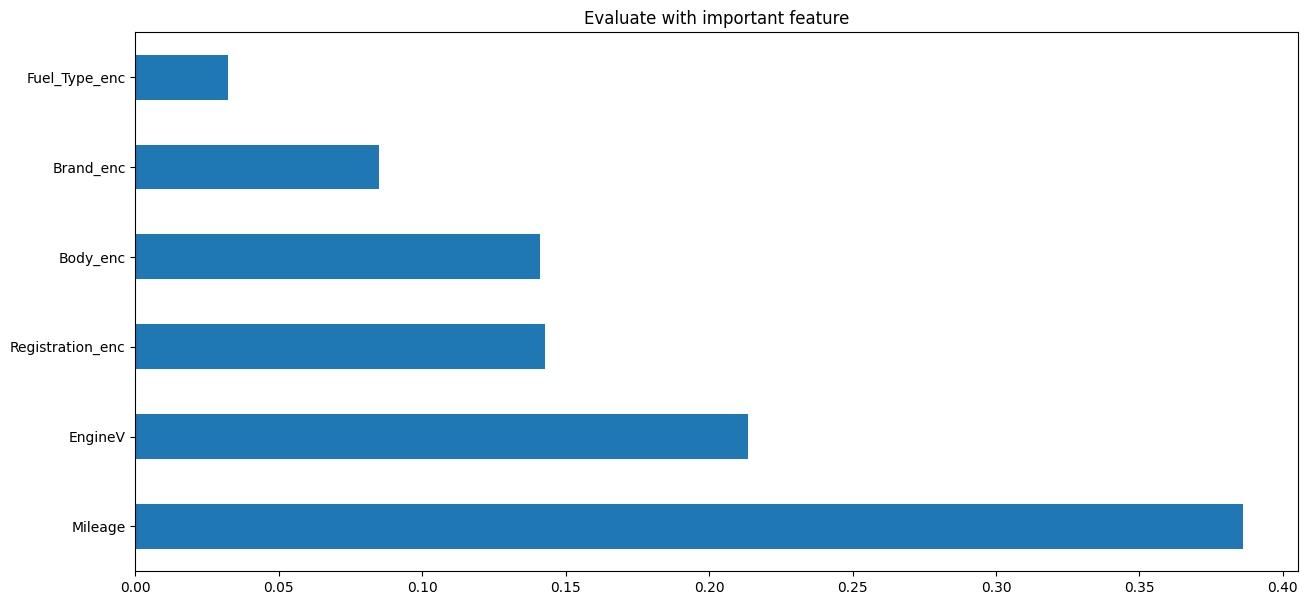

In [130]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[15,7])
feat_importances = pd.Series(good_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Evaluate with important feature')
plt.show()

In [131]:
imp_X_train = X_train[['Mileage','Body_enc','Registration_enc','EngineV']]

In [132]:
imp_X_test=X_test[['Mileage','Brand_enc','Registration_enc','EngineV']]

In [133]:
bootstrap         = False
max_depth         = 50
max_features      = 'sqrt'
min_samples_leaf  = 1
min_samples_split = 14
n_estimators      = 500

imp_good_model = RandomForestRegressor(bootstrap = bootstrap,
                                   max_depth = max_depth,
                                   max_features = max_features,
                                   min_samples_leaf = min_samples_leaf,
                                   min_samples_split = min_samples_split,
                                   n_estimators=n_estimators)

In [134]:
imp_good_model.fit(imp_X_train,y_train) # train model

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_split=14, n_estimators=500)

In [137]:
print (f'Traning r2_score: {r2_score(y_train, imp_good_model.predict (imp_X_train))}')
# print (f'Testing r2_score: {r2_score(y_test, imp_good_model.predict(imp_X_test))}')

Traning r2_score: 0.8582108423011399


<div class="alert alert-block alert-info">

<p><b>SHAP Global interpretability</b>

</div>

In [139]:
explainer = shap.TreeExplainer(good_model)

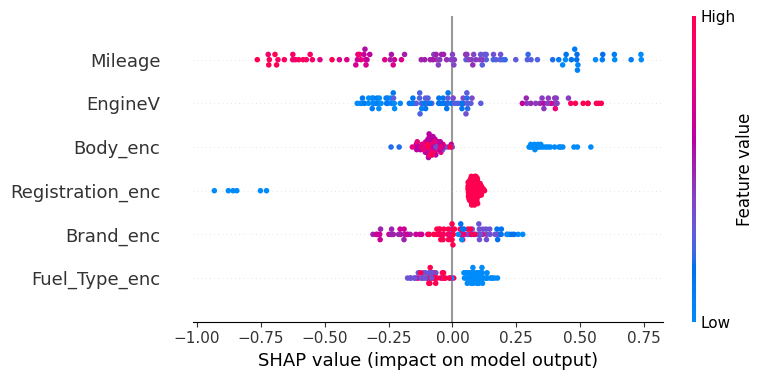

In [140]:
sample = X_test.sample(100)
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values, sample,max_display=10)

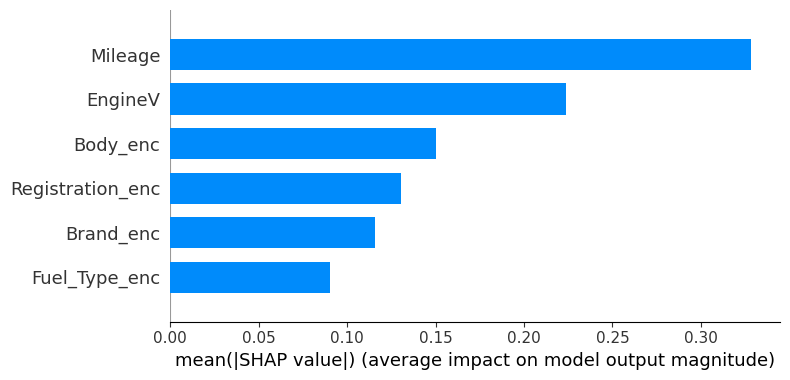

In [141]:
shap.summary_plot(shap_values, X, plot_type="bar")

as you see red means high and blue means Low and we have shap value impact at the bottom.
as a result, if you see the red ones on the right of zero, it means that the high value of a certain variable would impact positively the price of the car and the other way around for blue...

<div class="alert alert-block alert-info">

<p><b>Lime interpretability</b>

</div>

In [142]:
Lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),
                                                   mode = "regression",
                                                   feature_names=X_train.columns,
                                                   categorical_features=[0,1,2,3,4]
                                                  )

In [143]:
idx = np.random.randint(0, X_test.shape[0])

exp = Lime_explainer.explain_instance(data_row=X_test.iloc[idx],predict_fn=good_model.predict)

In [144]:
exp.show_in_notebook(show_table=True)

In [145]:
exp.as_list()

[('EngineV=1', -0.3597967931502614),
 ('Body_enc=3', -0.12546603845666943),
 ('Fuel_Type_enc=3', -0.11779680704159011),
 ('Mileage=144', 0.10037057152023693),
 ('Brand_enc=5', -0.07783284210893217),
 ('Registration_enc <= 1.00', 0.0)]

<div class="alert alert-block alert-info">
<p><b>Finally, lets manually check these predictions </b>
<p> To obtain the actual prices, we take the exponential of the log_price

</div>

In [146]:
df_ev = pd.DataFrame(np.exp(y_pred_good), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%']).head(20)
# df_ev.head(10)

Predicted Price  Actual Price  Residual  Difference%
693         13504.75      13500.00     -4.75         0.04
626          2852.78       2850.00     -2.78         0.10
665          9013.15       9000.00    -13.15         0.15
429          3489.43       3500.00     10.57         0.30
497         28804.29      28900.00     95.71         0.33
135        108408.81     107999.00   -409.81         0.38
727         19076.33      18999.00    -77.33         0.41
514         12431.45      12499.00     67.55         0.54
361         13422.43      13500.00     77.57         0.57
386         12776.22      12700.00    -76.22         0.60
731         17305.76      17200.00   -105.76         0.61
79          28173.06      28000.00   -173.06         0.62
76          17390.72      17500.00    109.28         0.62
126          8838.87       8900.00     61.13         0.69
700         75521.64      75000.00   -521.64         0.70
619          8439.98       8500.00     60.02         0.71
730          7659.56       7600.00    -59.56         0.78
712         13392.29      13500.00    107.71         0.80
521         10686.36      10777.00     90.64         0.84
645          3172.95       3200.00     27.05         0.85

<Axes: >

Text(0.5, 1.0, 'Performance of Random Forest')

Text(0, 0.5, 'Price')

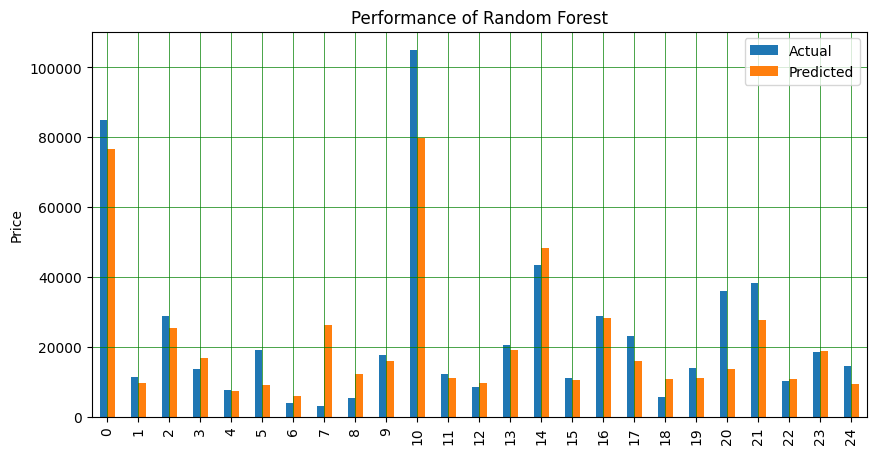

In [147]:
df_check = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(y_pred_good)})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Price')
plt.show()

<div class="alert alert-block alert-info">
<p><b>Machine Learning Pipeline</b>
<p>Pipelines are extremely useful tools to write clean and manageable code for machine learning.Creating a model takes a many steps such as clean our data, transform it, potentially use feature selection, and then run a machine learning algorithm. Using pipelines, we can do all these steps in one go!
</div>

In [148]:
# Create the pipeline
pipe = Pipeline([('RF', RandomForestRegressor())])

# Create the grid parameter
grid = [{'RF__bootstrap': [False],
         'RF__max_depth' : [27, 30], # maximum number of evels in each decision tree
         'RF__max_features': ['sqrt'],
         'RF__min_samples_leaf': [1, 2],
         'RF__min_samples_split': [9,10],
         'RF__n_estimators': [470,500]}]

# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe,
                  param_grid=grid,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch.fit(X_train, y_train)

# Best params
print('\nBest params:\n', gridsearch.best_params_)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('RF', RandomForestRegressor())]),
             param_grid=[{'RF__bootstrap': [False], 'RF__max_depth': [27, 30],
                          'RF__max_features': ['sqrt'],
                          'RF__min_samples_leaf': [1, 2],
                          'RF__min_samples_split': [9, 10],
                          'RF__n_estimators': [470, 500]}],
             scoring='accuracy')


Best params:
 {'RF__bootstrap': False, 'RF__max_depth': 27, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 9, 'RF__n_estimators': 470}


<div class="alert alert-block alert-info">
<p><b>Save trained model for future use</b>
<p>Write model to disk
</div>

In [149]:
# open a file, where you want to store the data
file = open('car_model.pkl', 'wb')

# dump information to that file
pickle.dump(good_model, file)
#we use a pickle file to store the data in a byte stream format

#Lazy Machine Learning

In [150]:
!pip install lazypredict -q
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle

In [151]:
CarPriceLazyModel = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = CarPriceLazyModel.fit(X_train, X_test, y_train, y_test)

 74%|███████▍  | 31/42 [00:17<00:05,  1.93it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:20<00:00,  2.01it/s]


In [152]:
models

Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
LGBMRegressor                                0.78       0.78   0.42   
HistGradientBoostingRegressor                0.78       0.78   0.43   
GradientBoostingRegressor                    0.76       0.77   0.44   
RandomForestRegressor                        0.76       0.76   0.45   
BaggingRegressor                             0.75       0.75   0.45   
ExtraTreesRegressor                          0.74       0.74   0.46   
XGBRegressor                                 0.74       0.74   0.47   
KNeighborsRegressor                          0.73       0.73   0.47   
NuSVR                                        0.72       0.72   0.48   
MLPRegressor                                 0.71       0.72   0.49   
SVR                                          0.71       0.71   0.49   
LinearRegression                             0.67       0.67   0.52   
LassoLarsIC                                  0.67       0.67   0.52   
LassoLarsCV                                  0.67       0.67   0.52   
LarsCV                                       0.67       0.67   0.52   
Lars                                         0.67       0.67   0.52   
TransformedTargetRegressor                   0.67       0.67   0.52   
Ridge                                        0.67       0.67   0.52   
RidgeCV                                      0.67       0.67   0.52   
BayesianRidge                                0.67       0.67   0.52   
LassoCV                                      0.67       0.67   0.52   
ElasticNetCV                                 0.67       0.67   0.52   
PoissonRegressor                             0.67       0.67   0.52   
SGDRegressor                                 0.67       0.67   0.52   
HuberRegressor                               0.66       0.67   0.53   
LinearSVR                                    0.66       0.67   0.53   
OrthogonalMatchingPursuitCV                  0.65       0.66   0.53   
RANSACRegressor                              0.60       0.60   0.57   
DecisionTreeRegressor                        0.60       0.60   0.58   
ExtraTreeRegressor                           0.56       0.57   0.60   
GammaRegressor                               0.53       0.53   0.62   
TweedieRegressor                             0.53       0.53   0.62   
AdaBoostRegressor                            0.51       0.52   0.63   
OrthogonalMatchingPursuit                    0.35       0.35   0.73   
ElasticNet                                   0.01       0.02   0.90   
Lasso                                       -0.01      -0.00   0.91   
DummyRegressor                              -0.01      -0.00   0.91   
LassoLars                                   -0.01      -0.00   0.91   
PassiveAggressiveRegressor                  -1.85      -1.83   1.53   
KernelRidge                               -105.40    -104.57   9.37   
GaussianProcessRegressor                -38968.41  -38665.93 179.28   

                               Time Taken  
Model                                      
LGBMRegressor                        0.26  
HistGradientBoostingRegressor        6.57  
GradientBoostingRegressor            0.33  
RandomForestRegressor                0.91  
BaggingRegressor                     0.10  
ExtraTreesRegressor                  0.67  
XGBRegressor                         0.54  
KNeighborsRegressor                  0.05  
NuSVR                                0.62  
MLPRegressor                         4.20  
SVR                                  1.11  
LinearRegression                     0.02  
LassoLarsIC                          0.03  
LassoLarsCV                          0.07  
LarsCV                               0.04  
Lars                                 0.03  
TransformedTargetRegressor           0.03  
Ridge                                0.02  
RidgeCV                              0.03  
BayesianRidge                        0.03  
LassoCV  

#DeepLearning

In [153]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [154]:
X.shape , y.shape

((3870, 6), (3870,))

In [155]:
X.sample()

Mileage  EngineV  Brand_enc  Body_enc  Fuel_Type_enc  Registration_enc
2888      130     2.00          2         1              3                 1

In [156]:
#set random seed
tf.random.set_seed(42)

#CreateModel
CarPriceDL1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1024,input_shape=[6]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1),
])

#CompileModel
CarPriceDL1.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    )

callback = EarlyStopping(
    min_delta=0, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

#FitModel
CarPriceDL1History = CarPriceDL1.fit(
    X_train,y_train,callbacks=[callback] , #EarlyStopping callback
    epochs=1000,verbose=0,validation_data=(X_test,y_test)
)

In [157]:
CarPriceDL1.evaluate(X_test,y_test)

25/25 [==============================] - 0s 4ms/step - loss: 0.4471


0.44711989164352417

<Axes: >

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

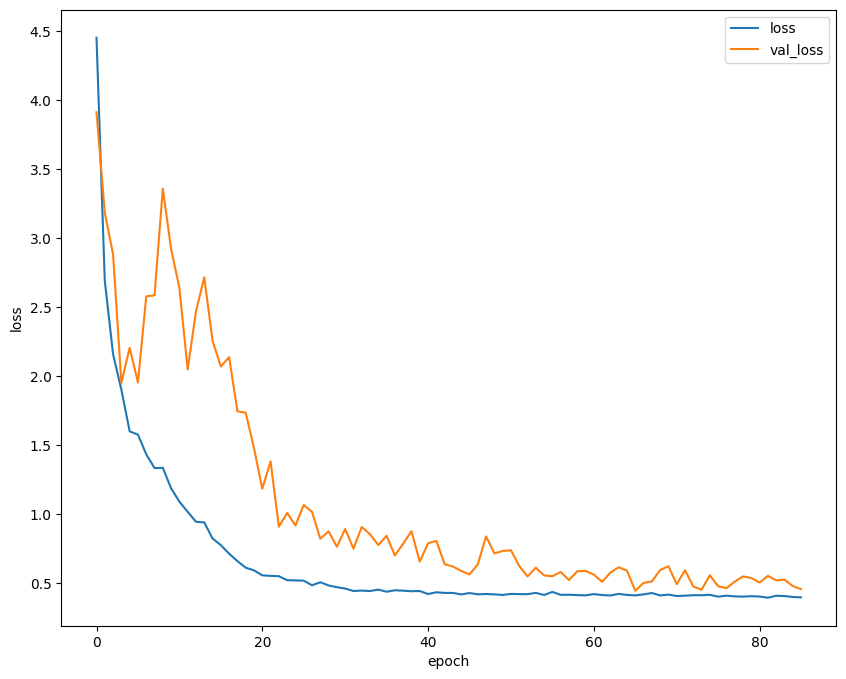

In [158]:
pd.DataFrame(CarPriceDL1History.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")

In [159]:
CarPriceDL1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              7168      
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

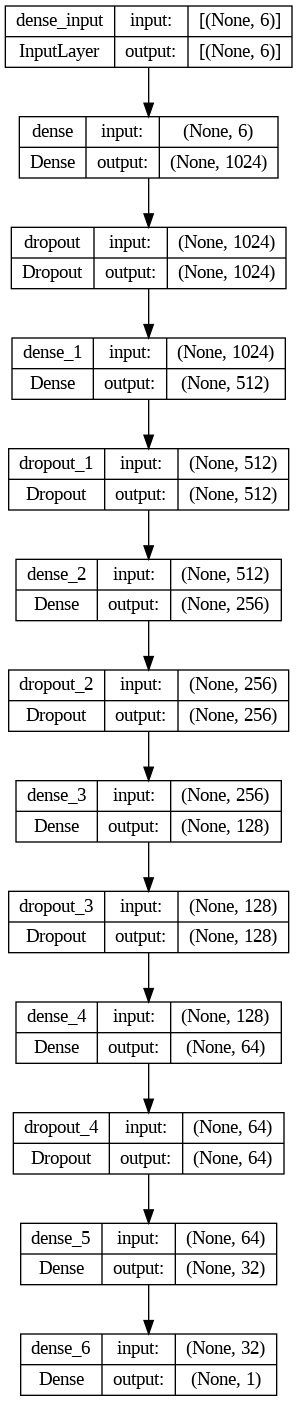

In [160]:
plot_model(CarPriceDL1, show_shapes=True)

In [161]:
y_pred_DL1 = CarPriceDL1.predict(X_test)

25/25 [==============================] - 0s 8ms/step


In [162]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_test, y_pred_DL1.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.44711986>

In [163]:
df_ev = pd.DataFrame(np.exp(y_pred_DL1), columns=['Predicted'])

# We can also include the Actual column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual'] - df_ev['Predicted']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%']).head(20)

Predicted   Actual  Residual  Difference%
669    8303.98  8300.00     -3.98         0.05
190   12743.13 12750.00      6.87         0.05
671    3892.72  3900.00      7.28         0.19
246    8521.54  8499.00    -22.54         0.27
549    9424.50  9450.00     25.50         0.27
471    6478.89  6500.00     21.11         0.32
404    6918.78  6950.00     31.22         0.45
354    9253.59  9300.00     46.41         0.50
450   10054.85  9999.00    -55.85         0.56
605    9556.78  9500.00    -56.78         0.60
668    8645.42  8700.00     54.58         0.63
158    7352.35  7400.00     47.65         0.64
383   10266.40 10200.00    -66.40         0.65
257    8144.64  8200.00     55.36         0.68
580    7943.82  7999.00     55.18         0.69
587   12809.17 12900.00     90.83         0.70
479    3127.58  3100.00    -27.58         0.89
68     3119.79  3150.00     30.21         0.96
624    8217.12  8100.00   -117.12         1.45
137    8635.12  8500.00   -135.12         1.59

<div class="alert alert-block alert-info">
<p><b>  Conclusion </b></p>

<p>Machine learning is like making a mixed fruit juice. If we want to get the best-mixed juice, we need to mix all fruit not by their size but based on their right proportion


</div>

<div class="alert alert-block alert-success">
<p><b>  Arian Azmoudeh </b></p>
<p><a href="https://www.linkedin.com/in/arianazmoudeh"> https://www.linkedin.com/in/arianazmoudeh </a>
</div>

<div class="alert alert-block alert-danger">
<p><b>One small positive thought can change your whole day :)

<p>Be positive. Be true. Be kind:)

</div>

<p>Thank you very much for your attention

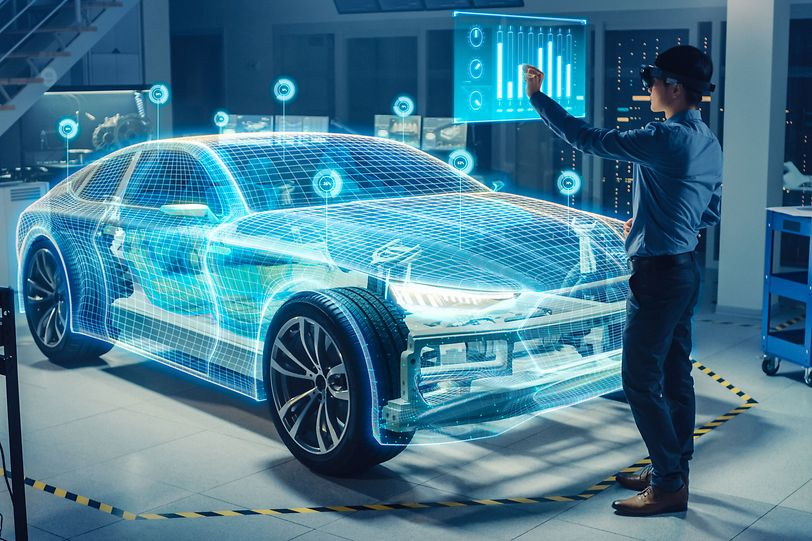

In [164]:
#END